<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Let's-first-look-at-the-base-SNR-with-both-pumps-off" data-toc-modified-id="Let's-first-look-at-the-base-SNR-with-both-pumps-off-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Let's first look at the base SNR with both pumps off</a></span></li><li><span><a href="#Now-with-only-the-TWPA-on" data-toc-modified-id="Now-with-only-the-TWPA-on-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Now with only the TWPA on</a></span></li><li><span><a href="#Now-we-look-at-the-SNR-with-JPA,-vs-flux-and-power" data-toc-modified-id="Now-we-look-at-the-SNR-with-JPA,-vs-flux-and-power-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Now we look at the SNR with JPA, vs flux and power</a></span><ul class="toc-item"><li><span><a href="#That's-pretty-damn-close-to-the-quantum-limit" data-toc-modified-id="That's-pretty-damn-close-to-the-quantum-limit-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>That's pretty damn close to the quantum limit</a></span><ul class="toc-item"><li><span><a href="#This-looks-like-we're-doing-better-than-quantum-limit,-but-we're-very-much-guessing-at-the-noise-temperature-with-both-pumps-off." data-toc-modified-id="This-looks-like-we're-doing-better-than-quantum-limit,-but-we're-very-much-guessing-at-the-noise-temperature-with-both-pumps-off.-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>This looks like we're doing better than quantum limit, but we're very much guessing at the noise temperature with both pumps off.</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import numpy as np
import Labber
import matplotlib.pyplot as plt

# Let's first look at the base SNR with both pumps off

In [2]:
lf_OFF = Labber.LogFile(r'G:\Shared drives\LFL\Labber\Data\2022\06\Data_0608\NBR19_ampTuneup_bothPumpsOff.hdf5')
sig_OFF = lf_OFF.getData(name='HP Spectrum Analyzer - Signal')

In [3]:
sig_OFF.shape

(10, 401)

In [6]:
xdata,ydata = lf_OFF.getTraceXY(y_channel='HP Spectrum Analyzer - Signal')

In [7]:
from fitTools.utilities import Watt2dBm, dBm2Watt, VNA2dBm

In [8]:
linsig_OFF = dBm2Watt(sig_OFF)
avg_OFF = np.mean(linsig_OFF,axis=0)

With both pumps off, the SNR is 20.317 dB


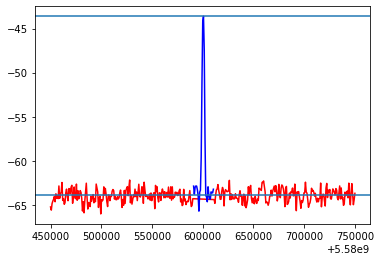

In [17]:
max_ind=np.argmax(avg_OFF)
max_val=np.max(avg_OFF)
mask = np.logical_or(xdata < xdata[max_ind]-10e3, xdata > xdata[max_ind]+10e3)
noise=avg_OFF[mask]
avg_noise=np.mean(noise)
snr = Watt2dBm(max_val)-Watt2dBm(avg_noise)
print(f'With both pumps off, the SNR is {snr:.3f} dB')
plt.plot(xdata[mask],Watt2dBm(avg_OFF[mask]),'red')
plt.plot(xdata[~mask],Watt2dBm(avg_OFF[~mask]),'blue')
plt.axhline(Watt2dBm(max_val))
plt.axhline(Watt2dBm(avg_noise))

# Now with only the TWPA on

With just TWPA, the SNR is 30.551 dB


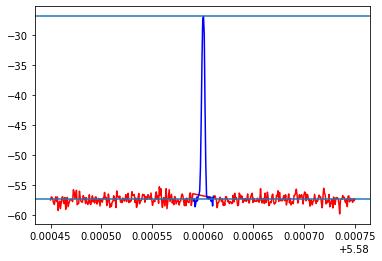

In [40]:
lf_TWPA = Labber.LogFile(r'G:\Shared drives\LFL\Labber\Data\2022\06\Data_0608\NBR19_ampTuneup_onlyTWPA.hdf5')
sig_TWPA = lf_TWPA.getData(name='HP Spectrum Analyzer - Signal')

linsig_TWPA = dBm2Watt(sig_TWPA)
avg_TWPA = np.mean(linsig_TWPA,axis=0)

max_ind=np.argmax(avg_TWPA)
max_val=np.max(avg_TWPA)
mask = np.logical_or(xdata < xdata[max_ind]-10e-6, xdata > xdata[max_ind]+10e-6)
noise=avg_TWPA[mask]
avg_noise=np.mean(noise)
snr = Watt2dBm(max_val)-Watt2dBm(avg_noise)
print(f'With just TWPA, the SNR is {snr:.3f} dB')
plt.plot(xdata[mask],Watt2dBm(avg_TWPA[mask]),'red')
plt.plot(xdata[~mask],Watt2dBm(avg_TWPA[~mask]),'blue')
plt.axhline(Watt2dBm(max_val))
plt.axhline(Watt2dBm(avg_noise))

In [14]:
print(f'The TWPA increases the SNR by {30.551 - 20.317:.3f} dB')

The TWPA increases the SNR by 10.234 dB


# Now we look at the SNR with JPA, vs flux and power

In [15]:
lf_JPA = Labber.LogFile(r'G:\Shared drives\LFL\Labber\Data\2022\06\Data_0608\NBR19_ampTuneup_JPAsweep.hdf5')
sig_JPA = lf_JPA.getData(name='HP Spectrum Analyzer - Signal')

datashape = (31,14,10,401)
sig_JPA = sig_JPA.reshape(datashape)
linsig_JPA = dBm2Watt(sig_JPA)
avg_JPA = np.mean(linsig_JPA,axis=-2)

power = lf_JPA.getData(name='10002F25 - Power')
power = power.reshape(datashape[:-1])
power = power[0,:,0]
print(power)


flux = lf_JPA.getData(name='Victor - Source current')*1e3
flux = flux.reshape(datashape[:-1])
flux = flux[:,0,0]
print(flux)

[12.5 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8]
[30.38 30.39 30.4  30.41 30.42 30.43 30.44 30.45 30.46 30.47 30.48 30.49
 30.5  30.51 30.52 30.53 30.54 30.55 30.56 30.57 30.58 30.59 30.6  30.61
 30.62 30.63 30.64 30.65 30.66 30.67 30.68]


In [19]:
# xdata *= 1e-9

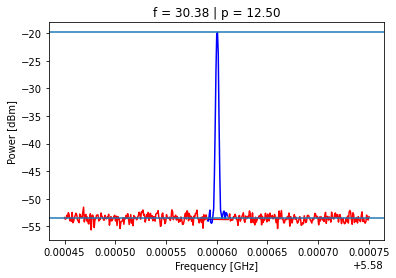

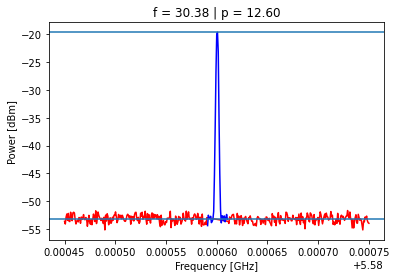

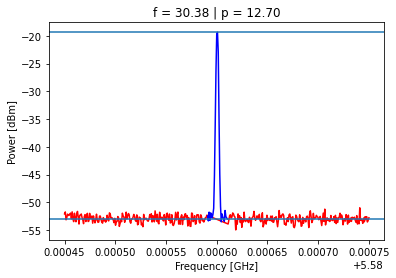

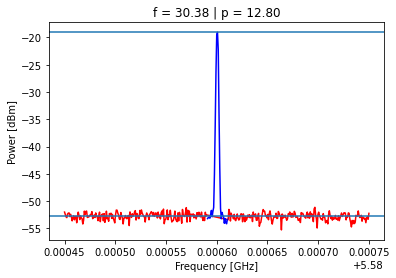

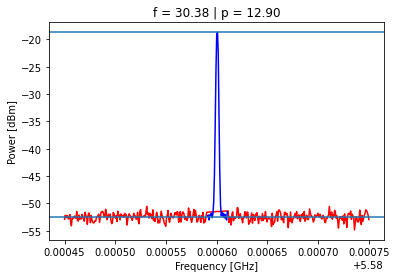

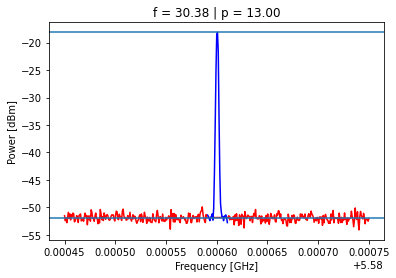

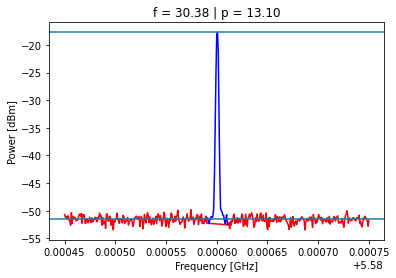

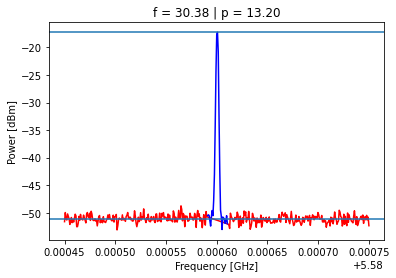

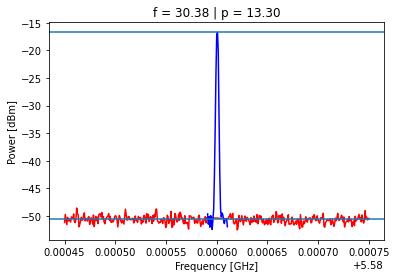

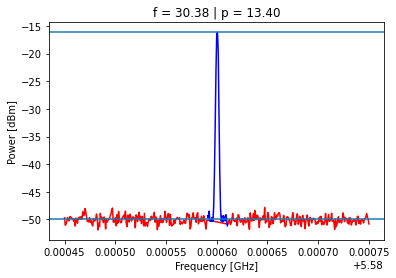

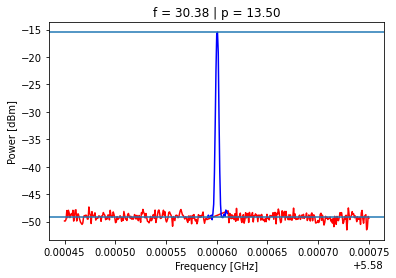

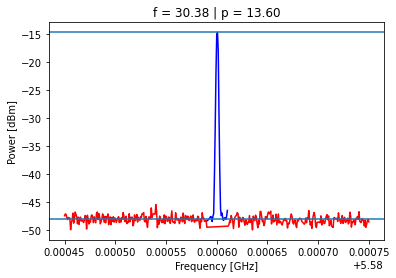

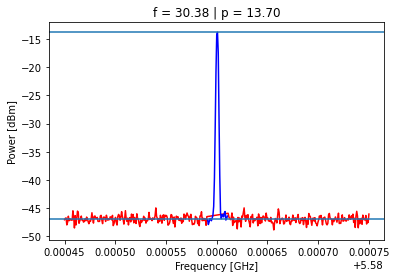

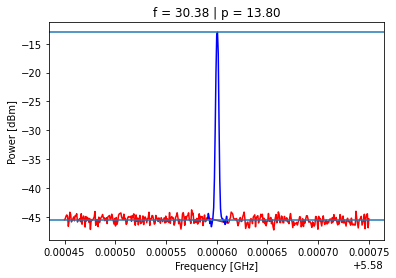

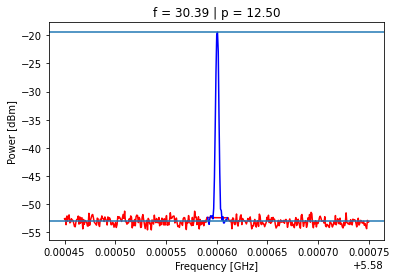

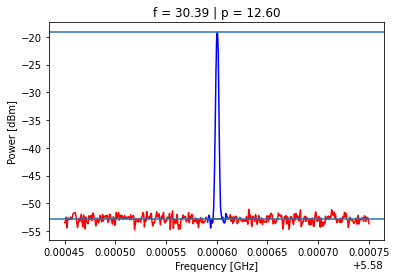

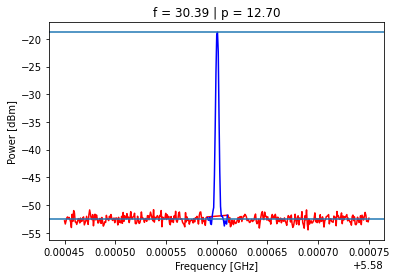

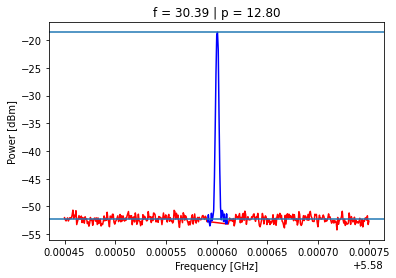

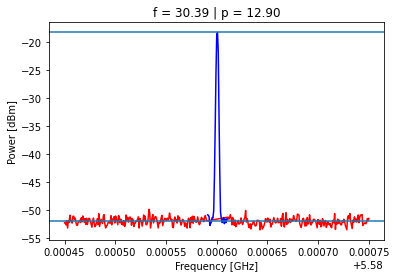

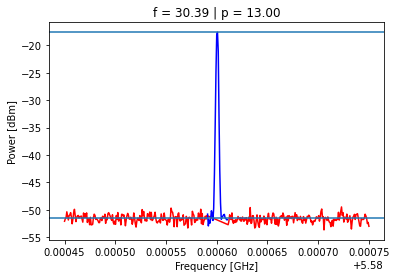

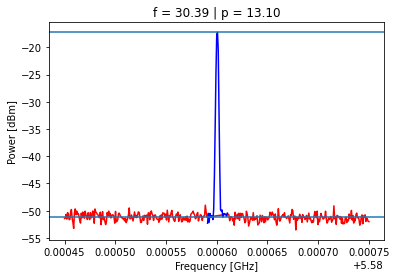

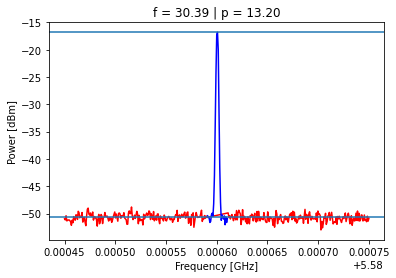

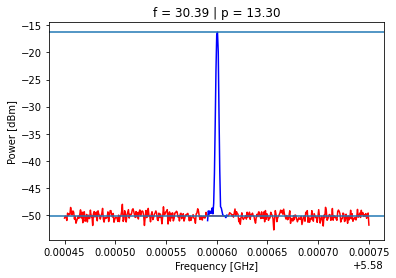

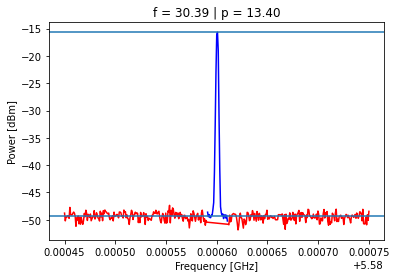

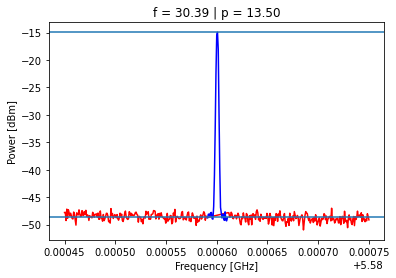

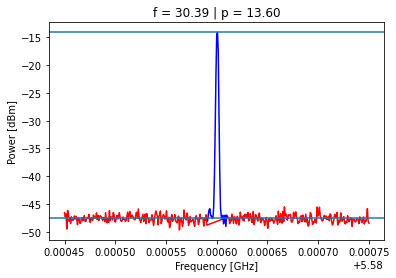

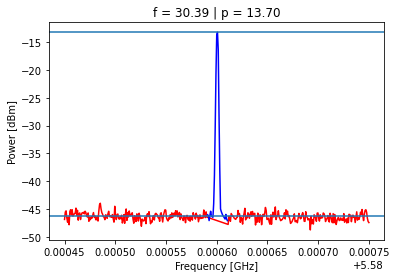

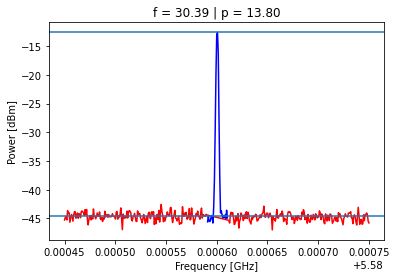

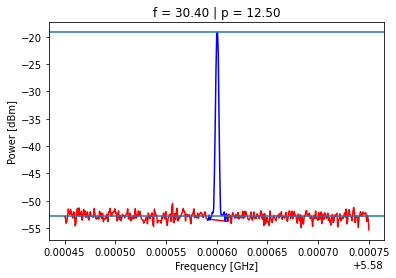

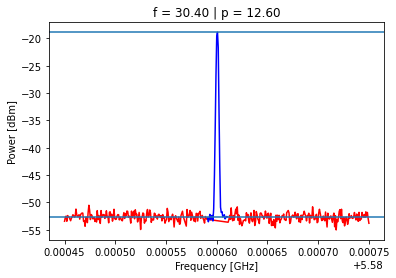

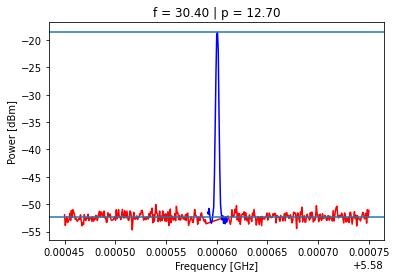

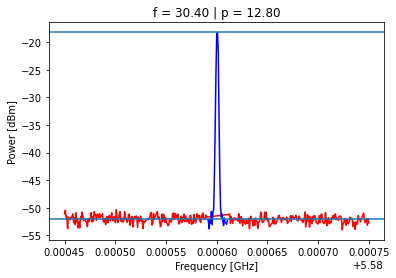

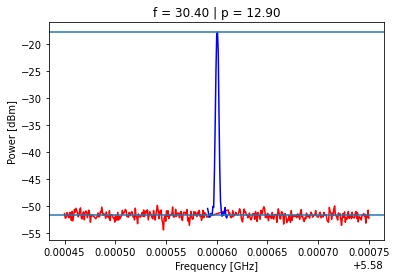

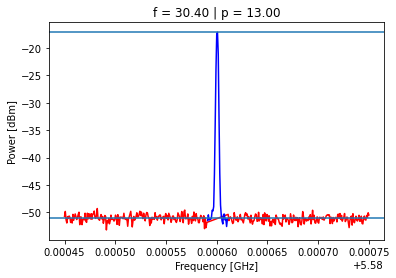

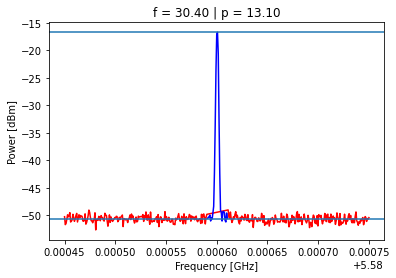

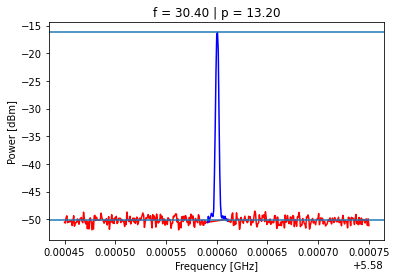

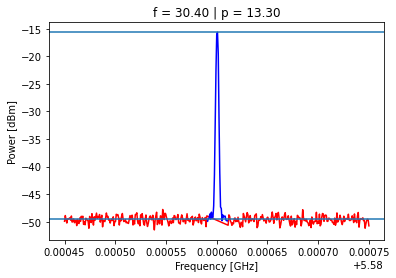

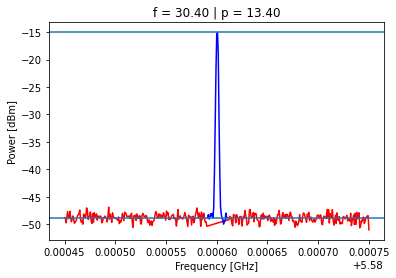

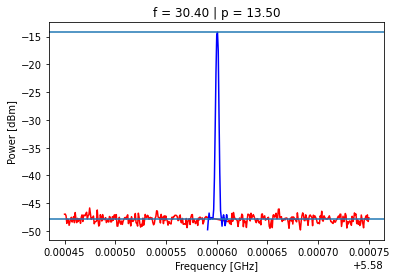

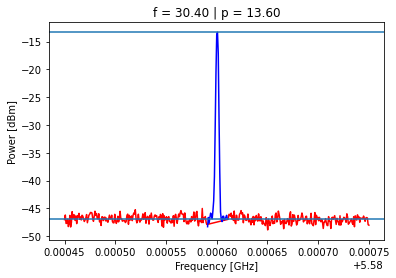

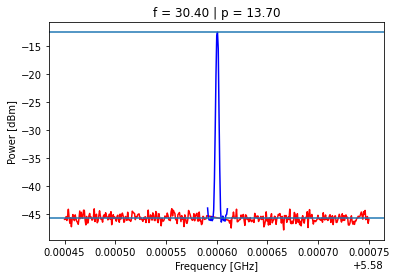

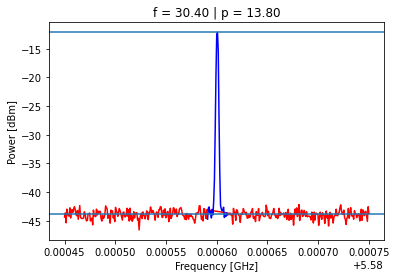

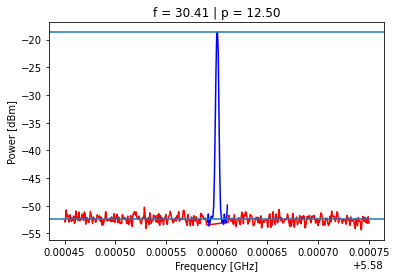

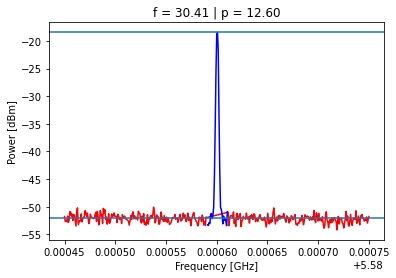

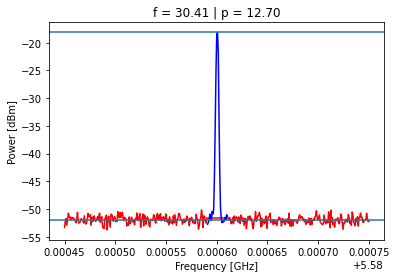

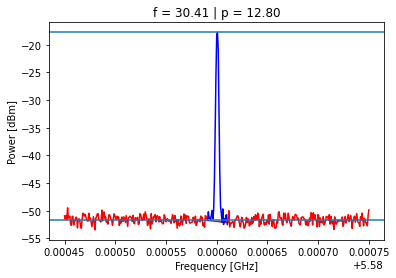

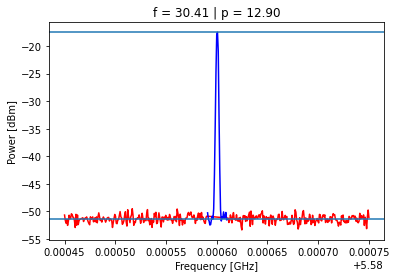

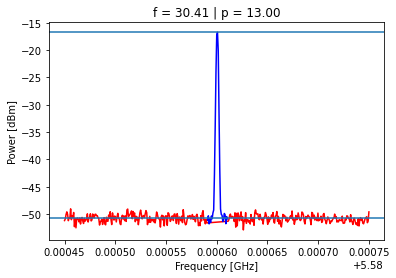

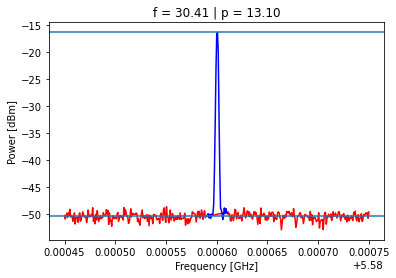

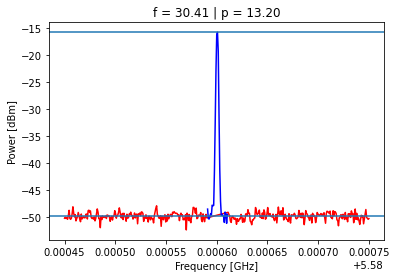

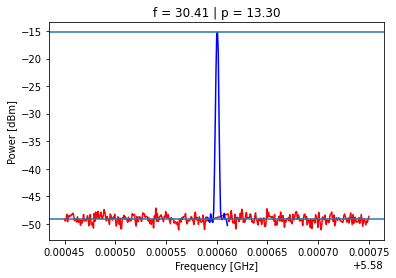

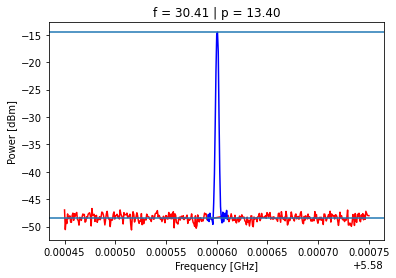

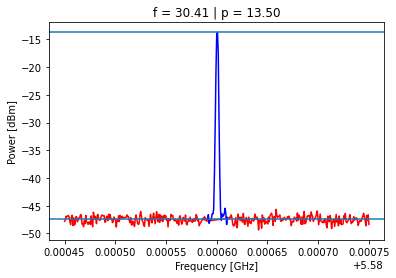

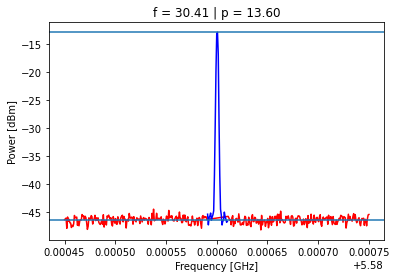

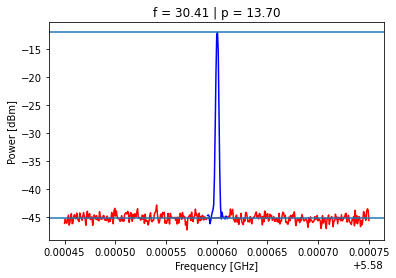

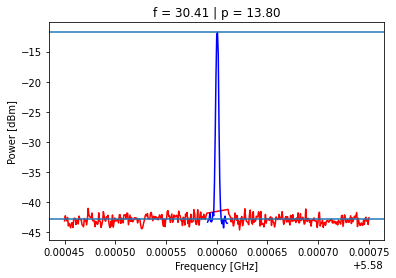

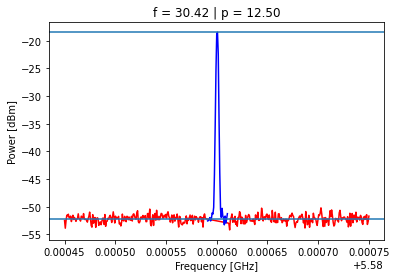

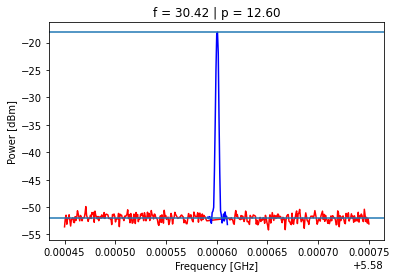

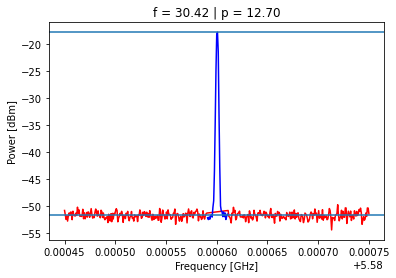

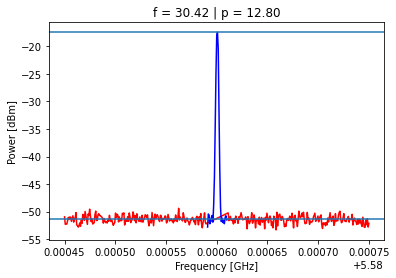

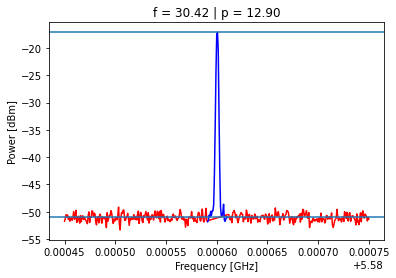

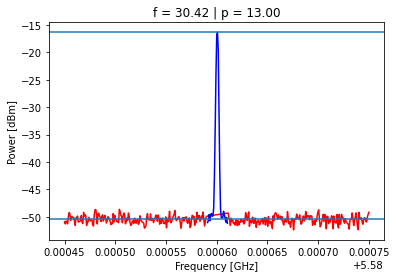

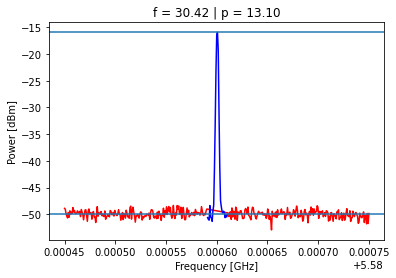

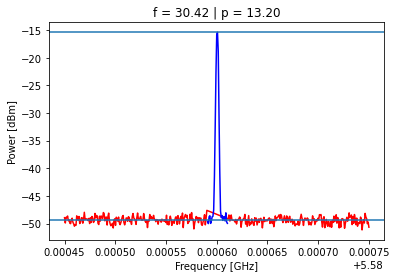

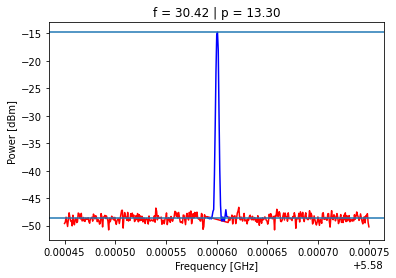

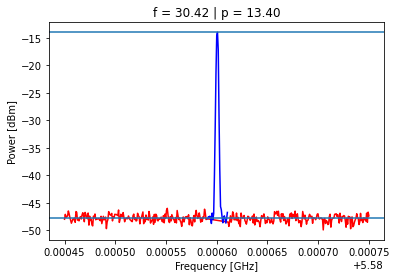

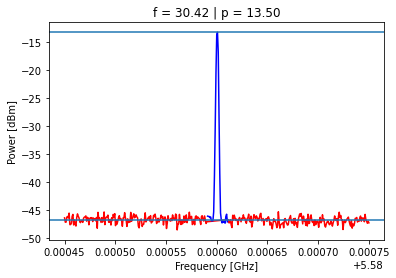

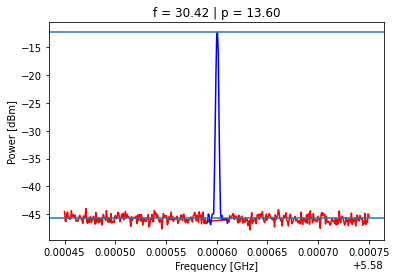

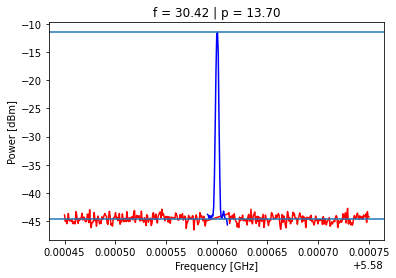

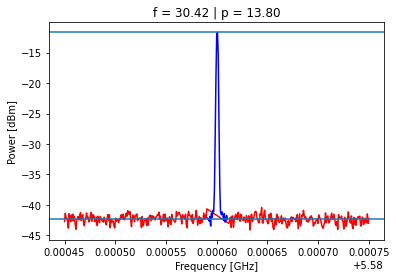

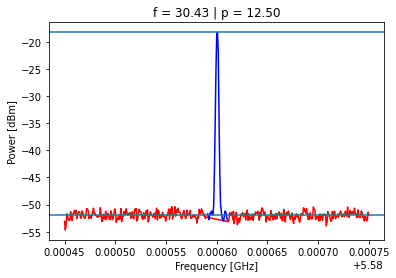

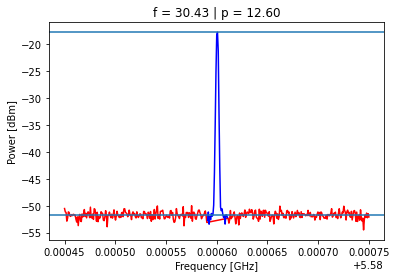

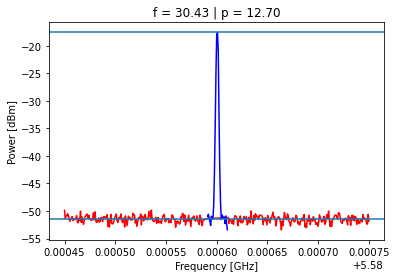

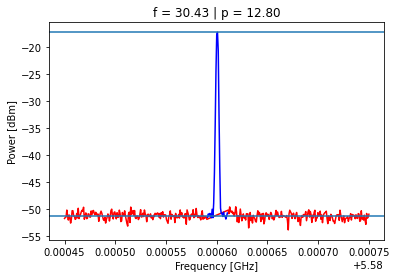

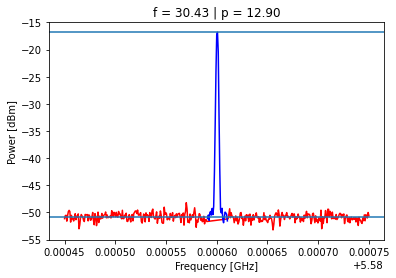

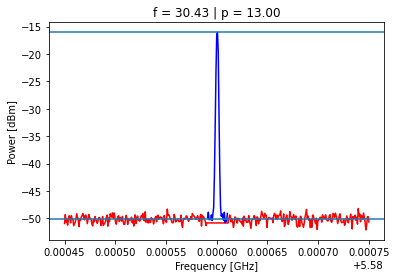

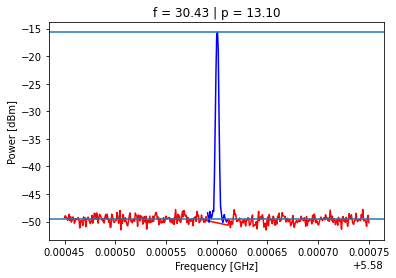

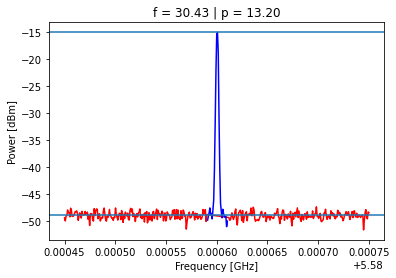

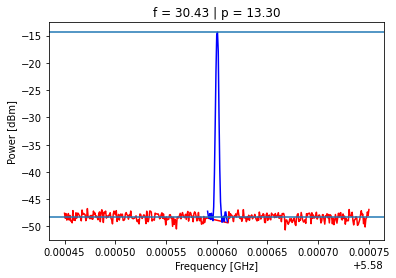

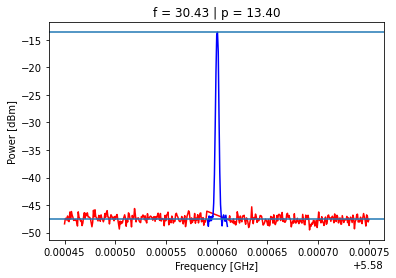

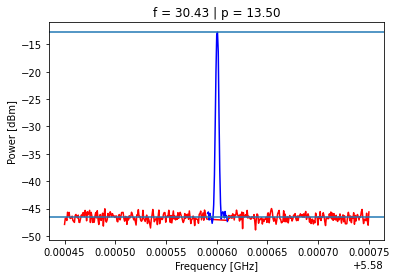

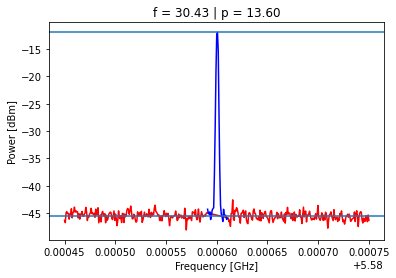

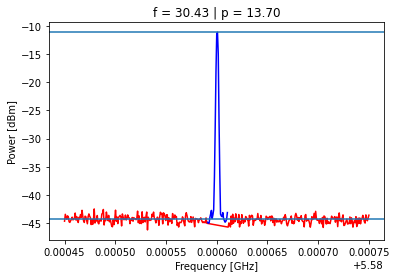

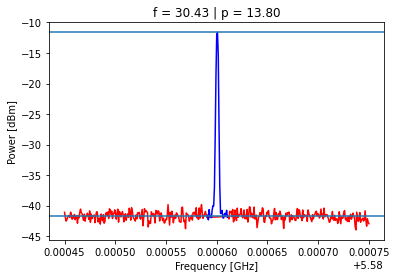

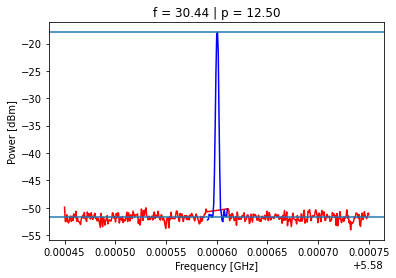

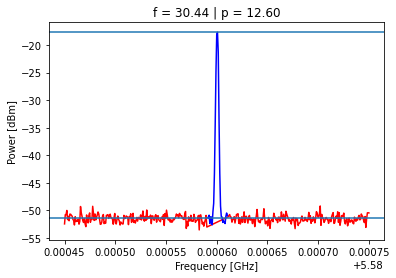

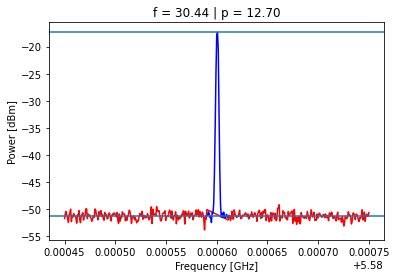

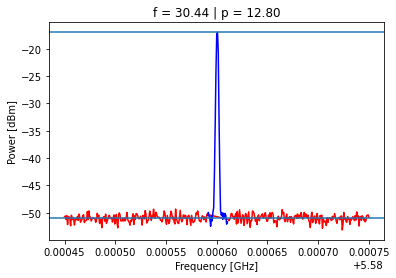

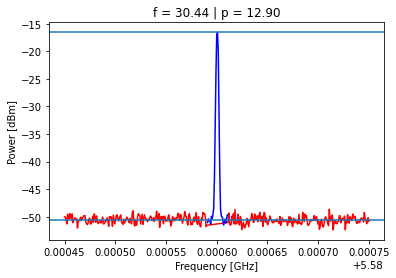

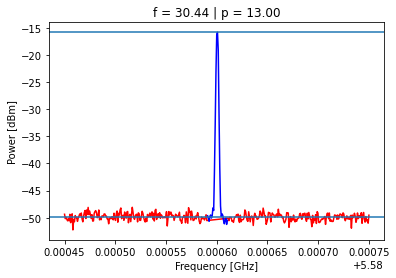

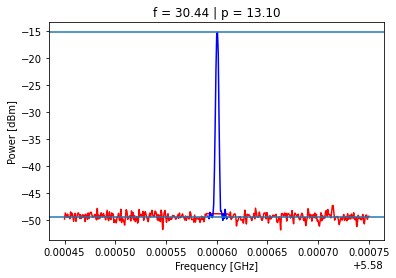

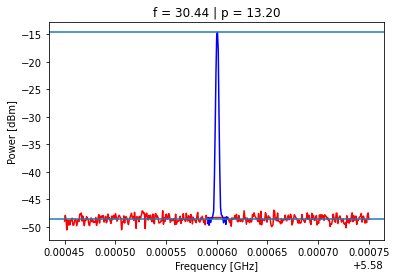

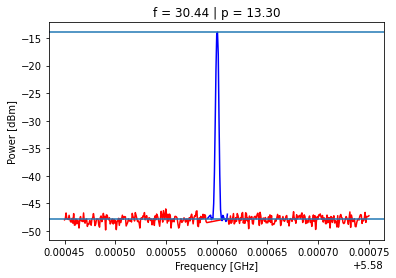

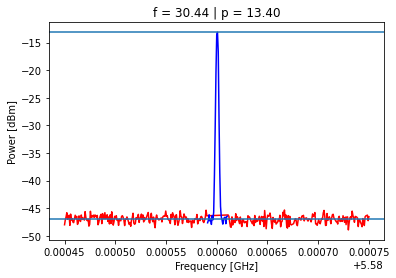

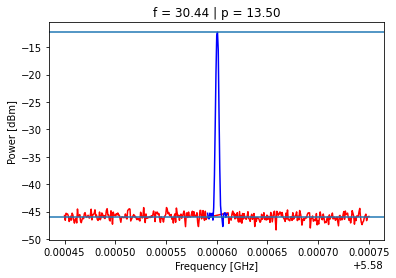

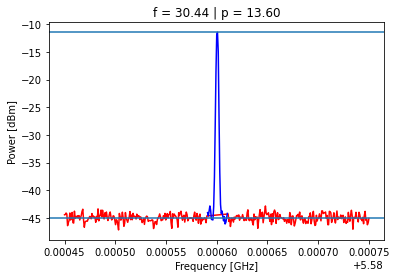

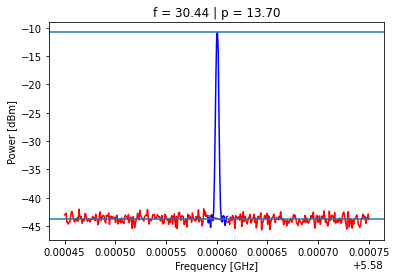

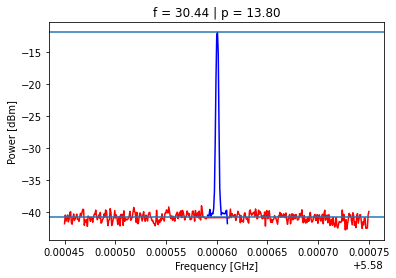

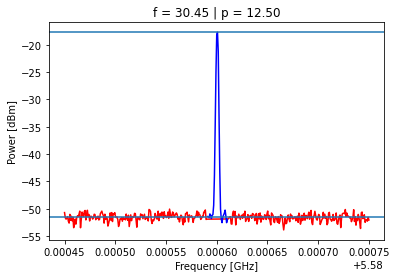

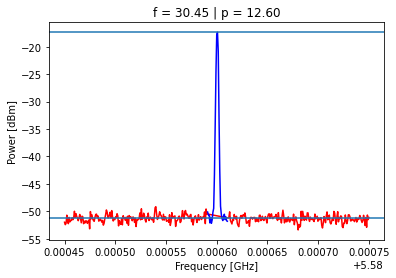

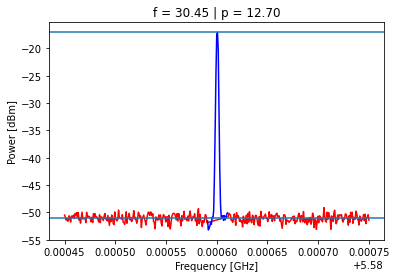

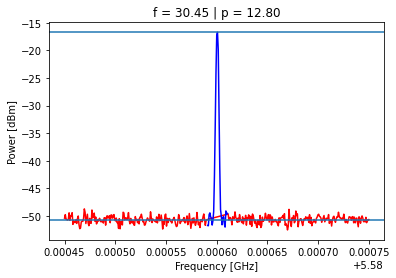

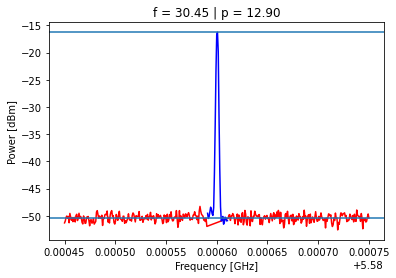

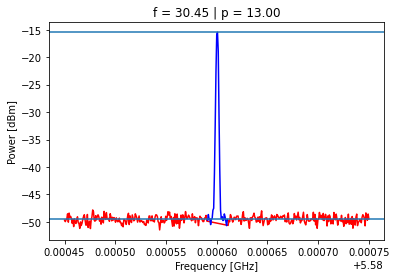

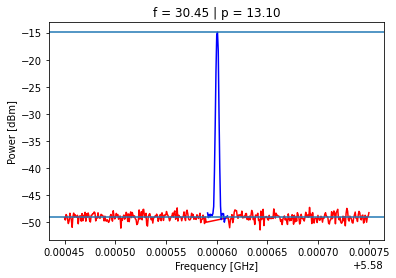

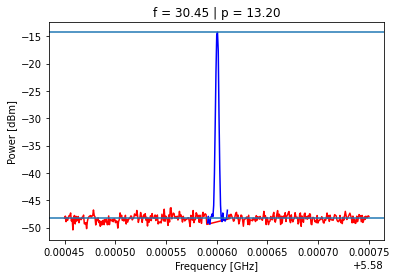

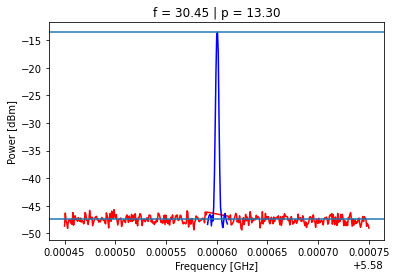

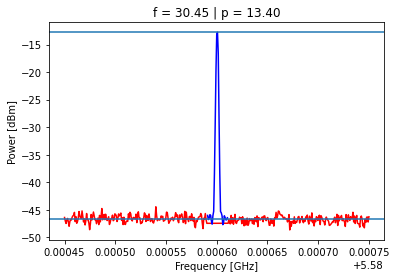

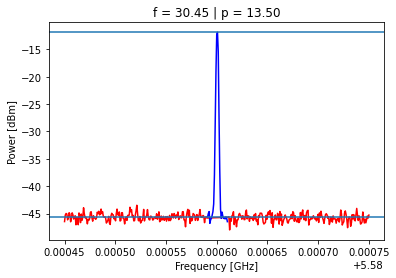

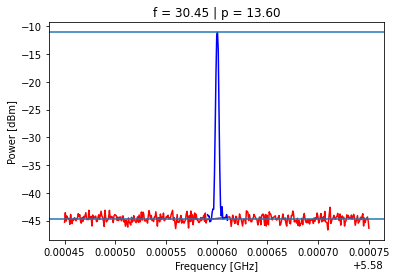

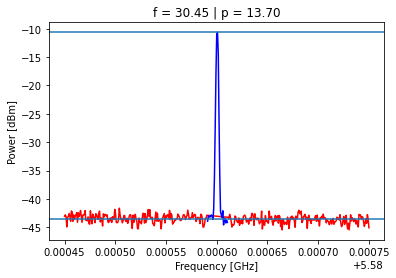

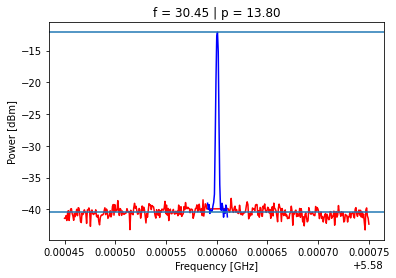

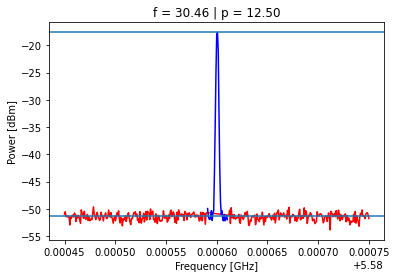

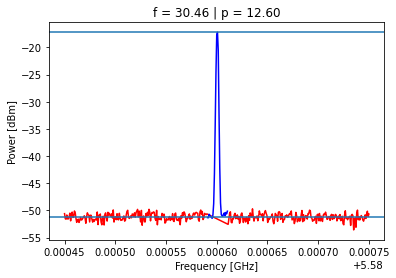

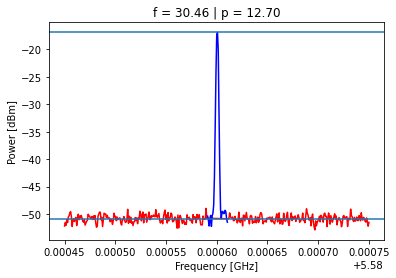

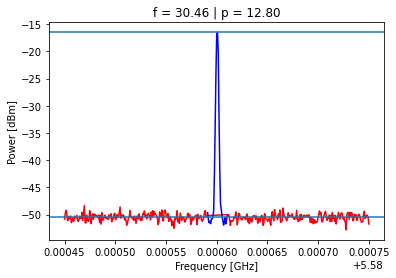

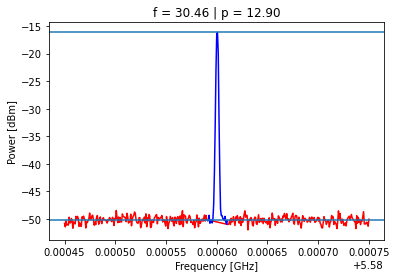

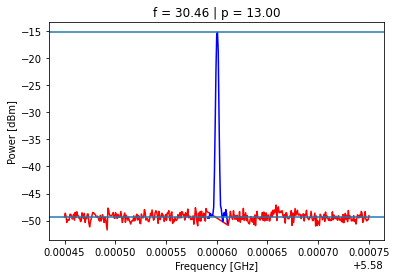

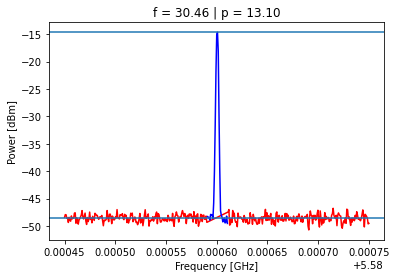

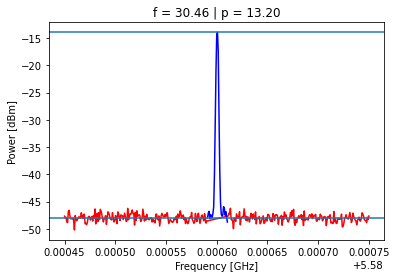

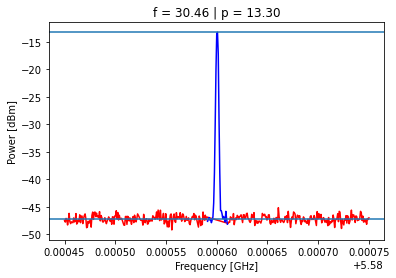

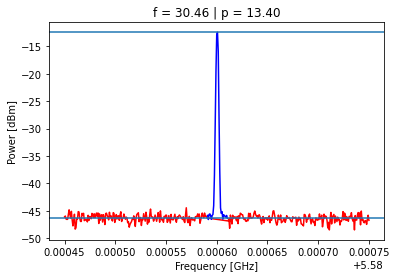

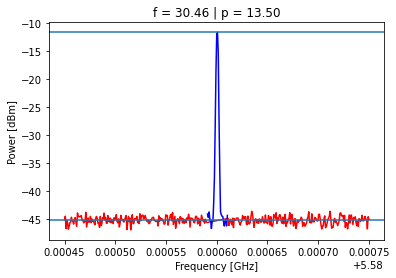

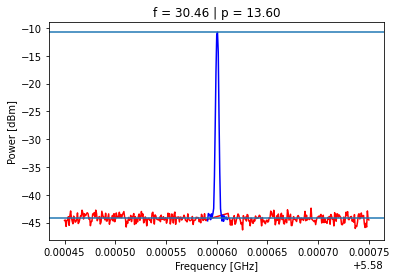

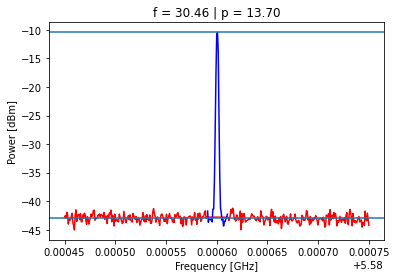

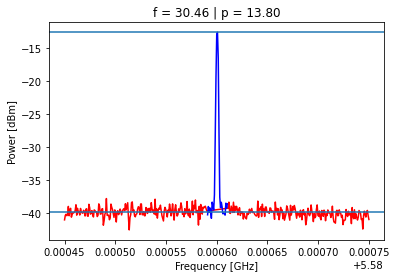

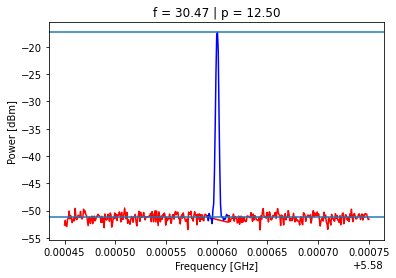

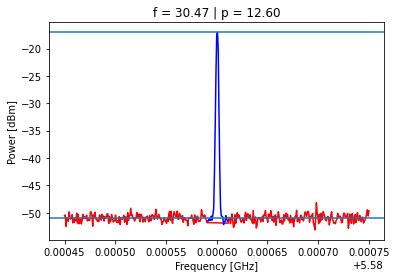

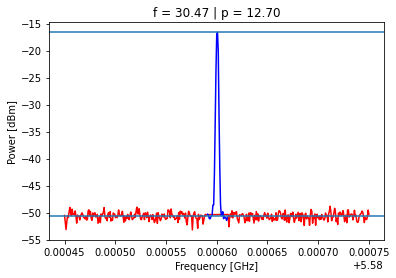

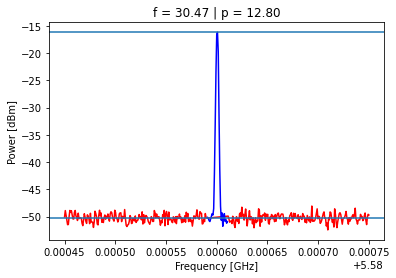

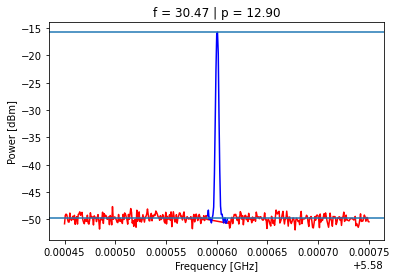

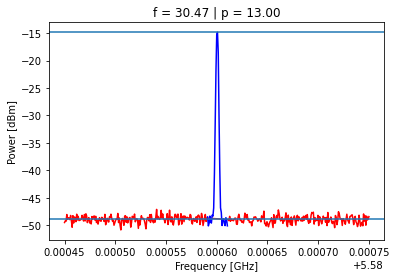

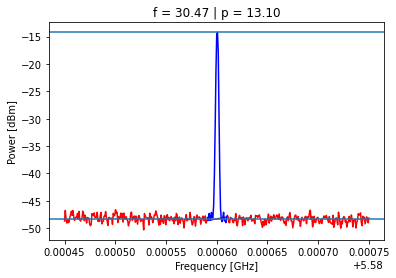

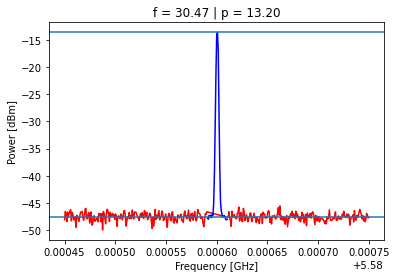

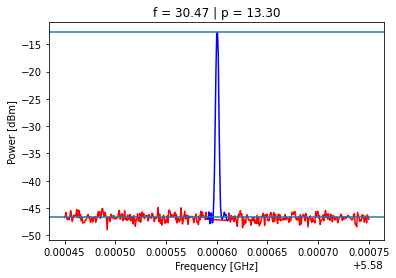

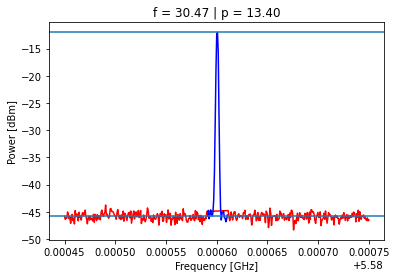

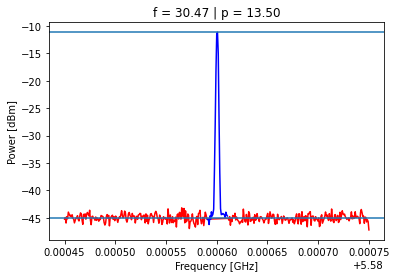

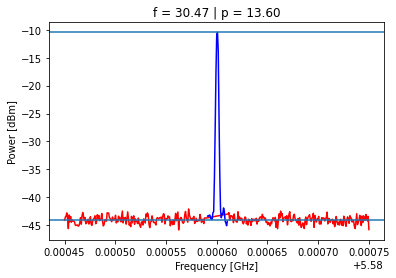

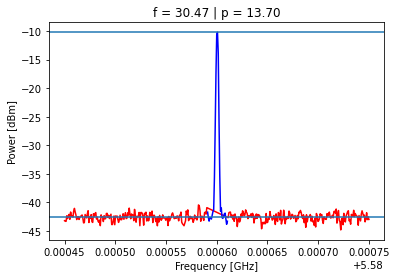

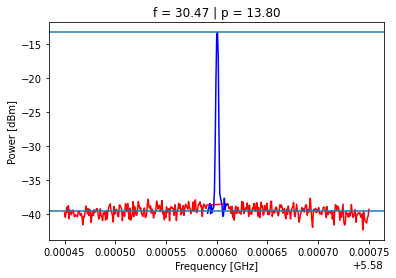

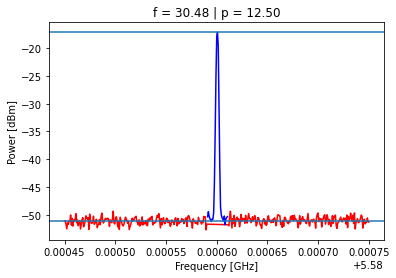

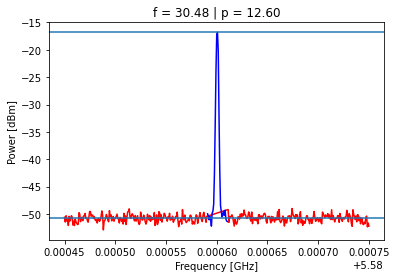

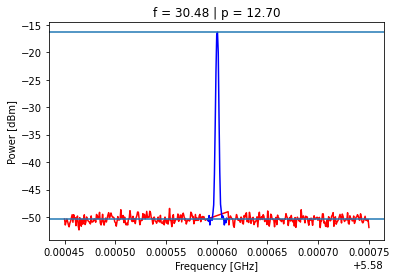

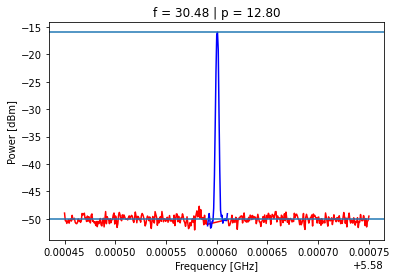

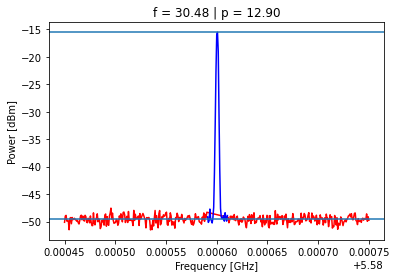

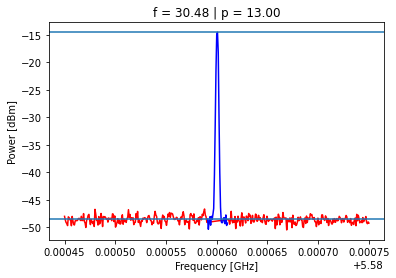

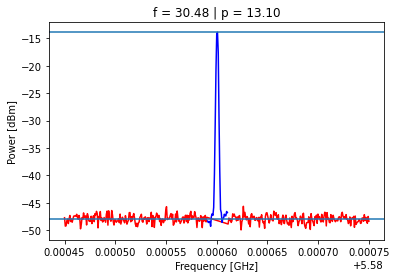

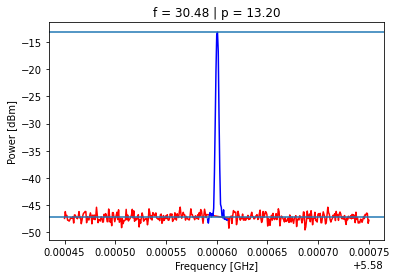

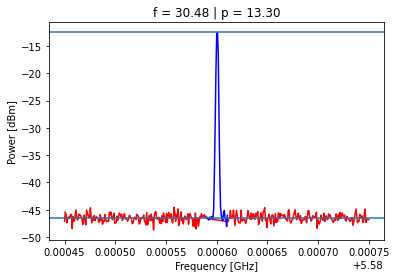

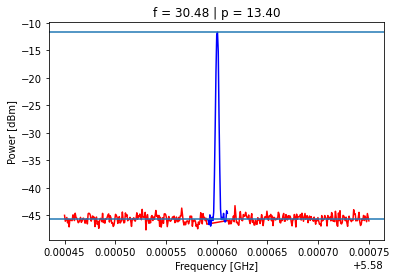

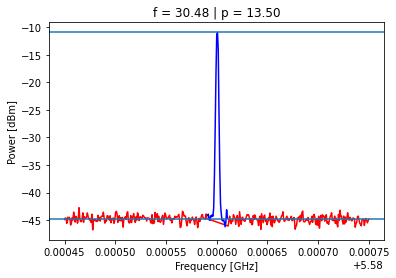

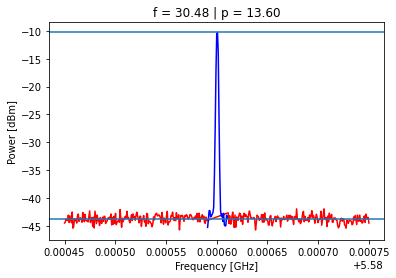

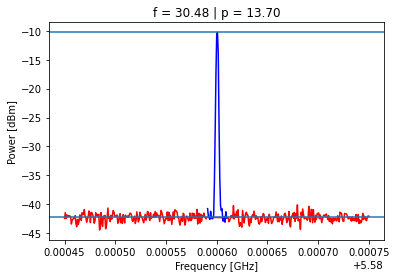

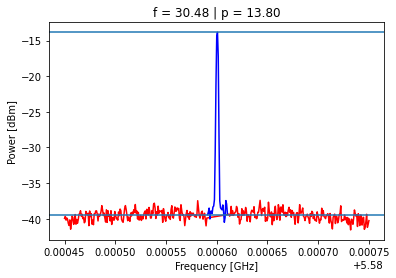

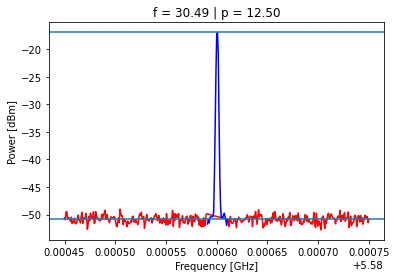

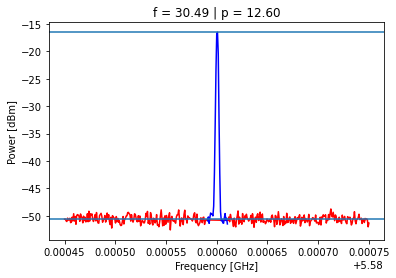

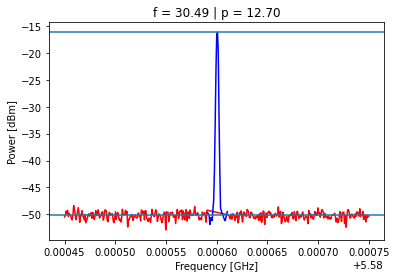

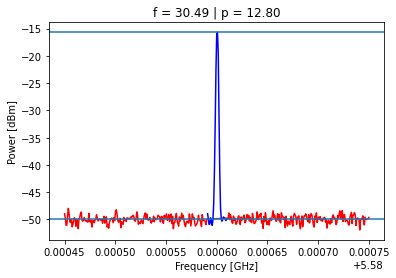

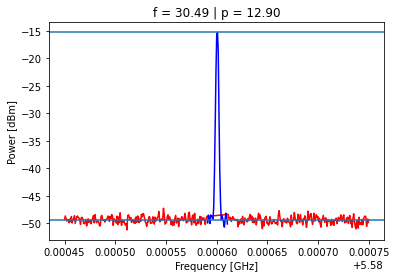

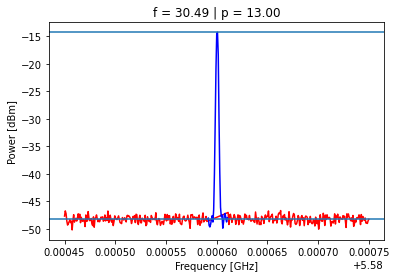

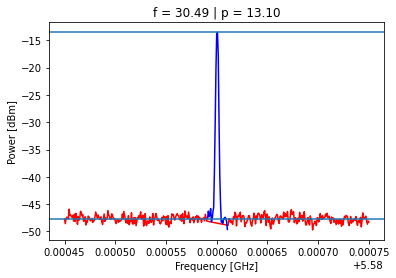

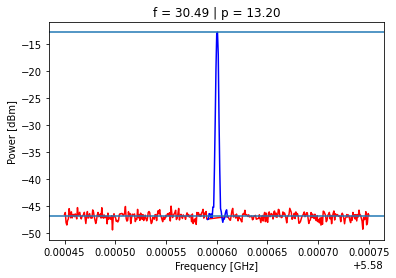

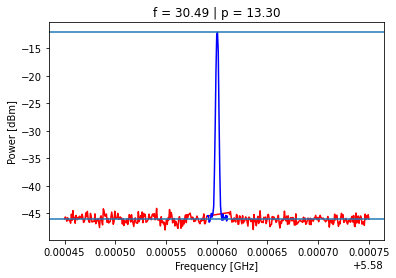

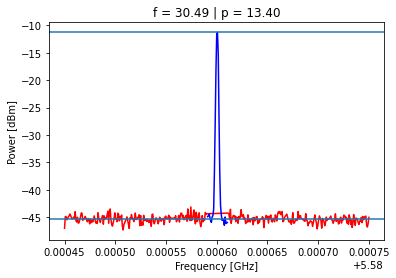

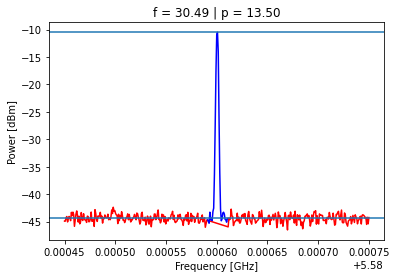

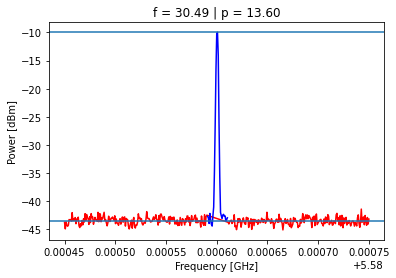

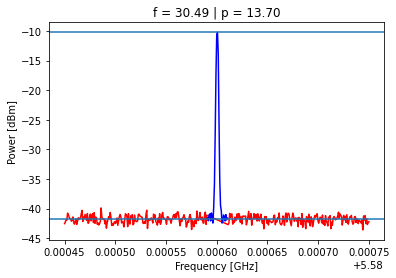

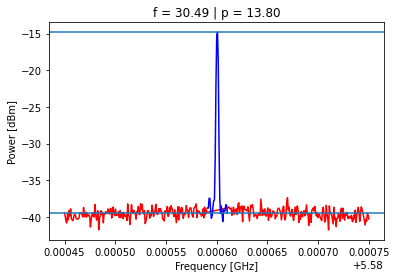

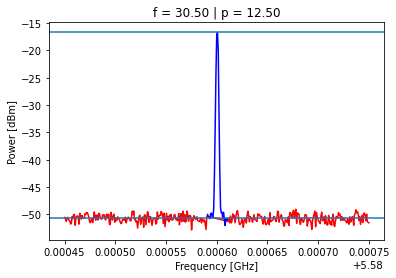

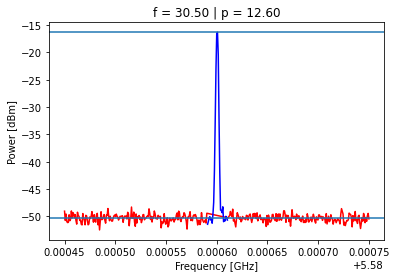

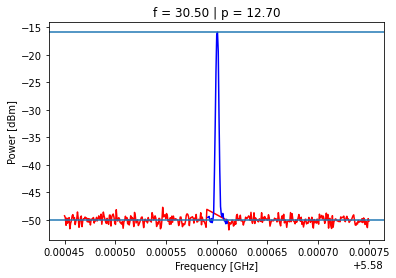

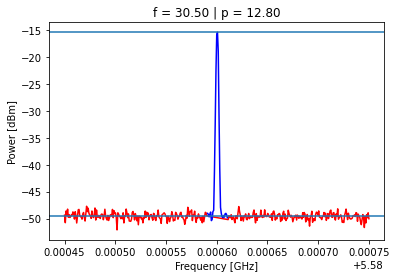

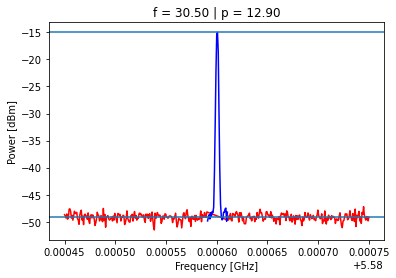

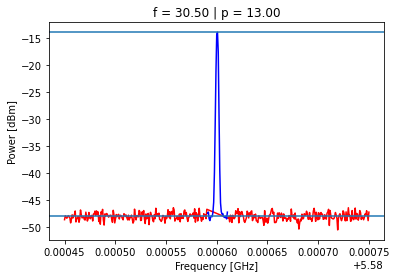

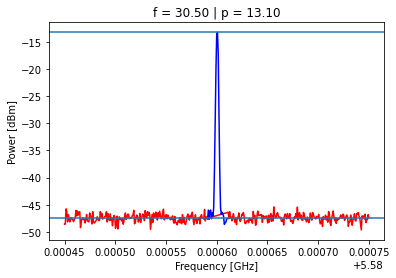

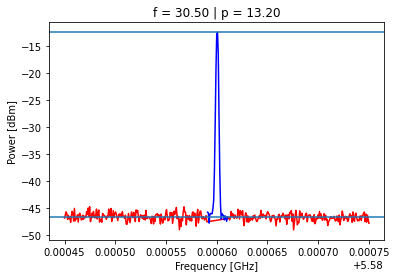

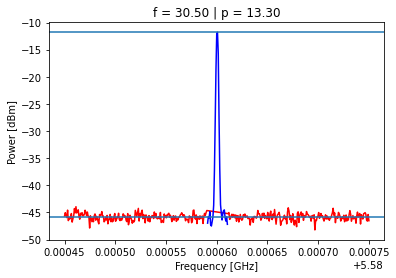

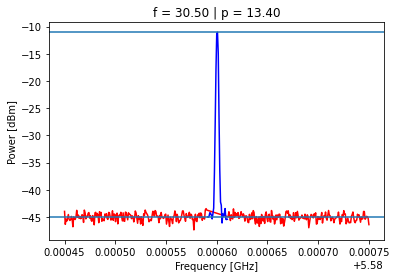

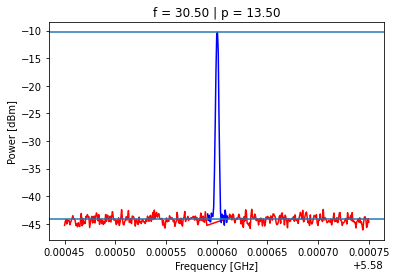

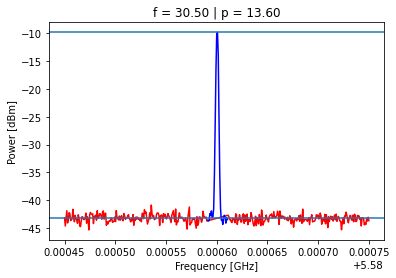

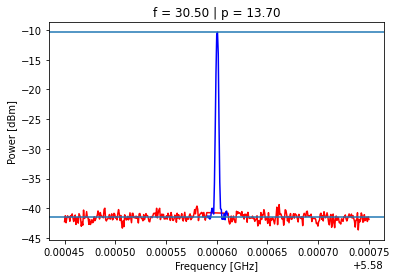

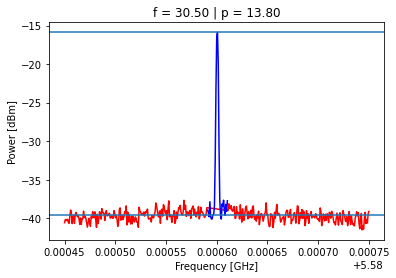

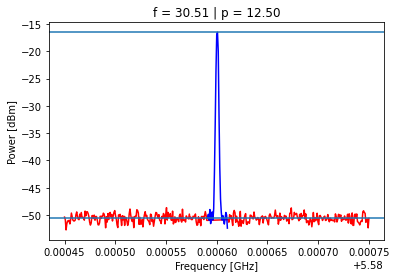

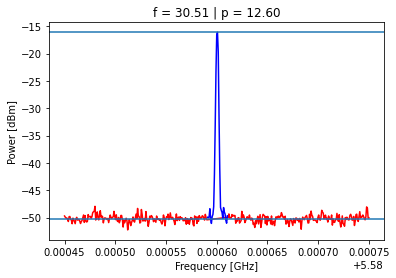

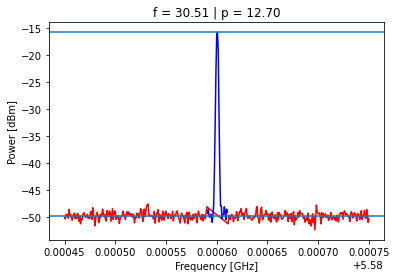

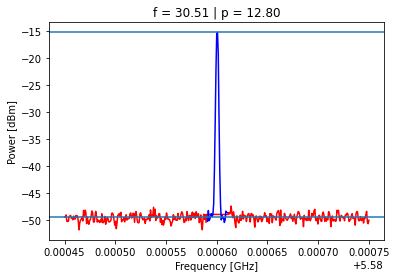

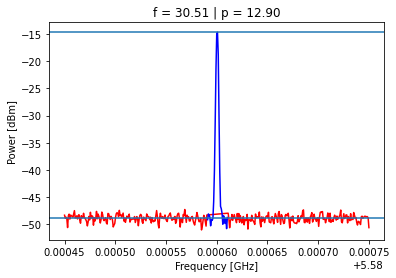

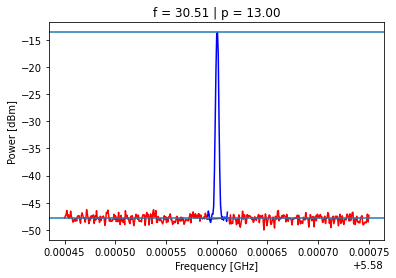

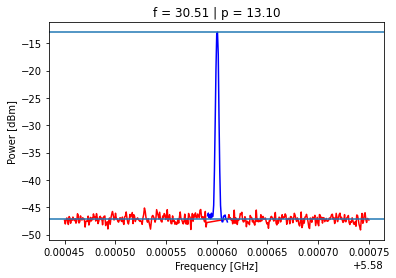

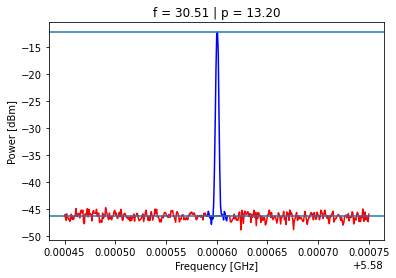

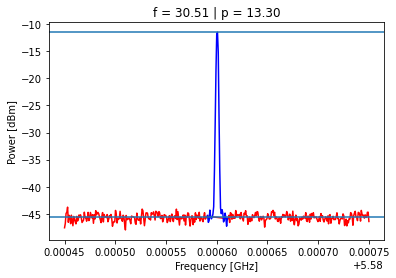

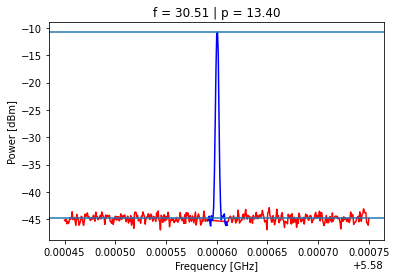

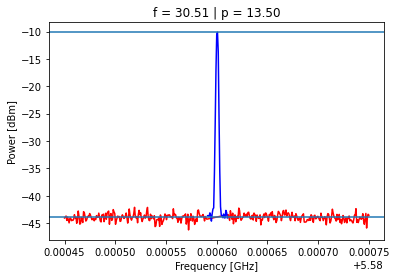

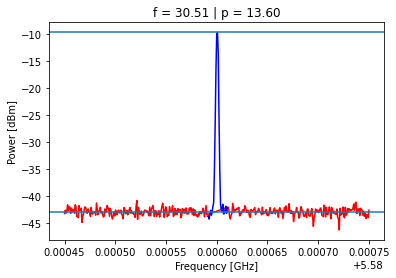

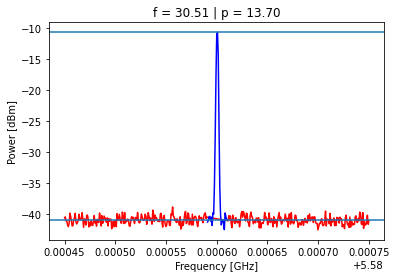

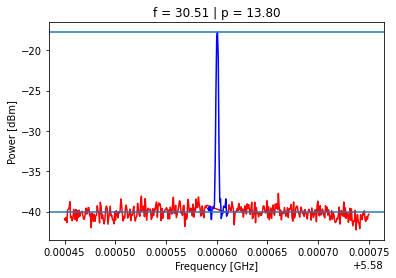

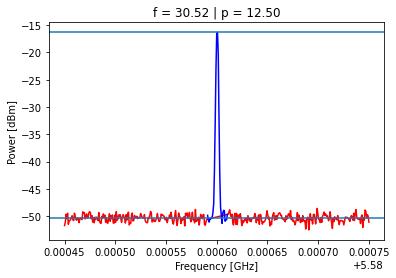

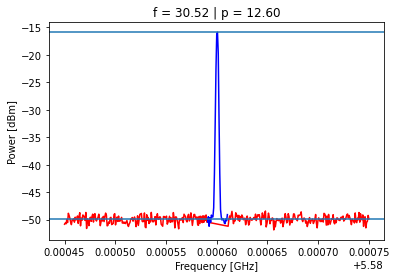

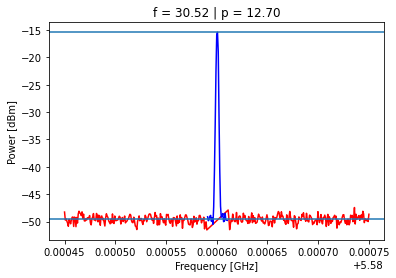

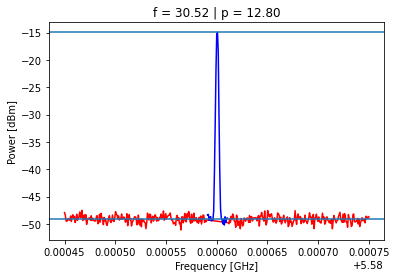

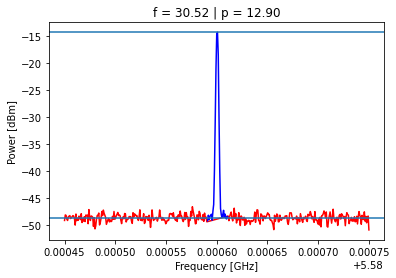

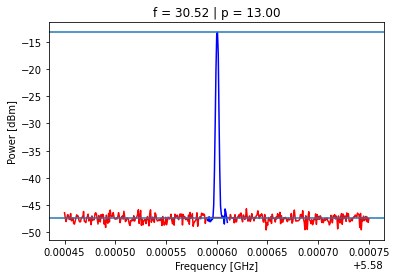

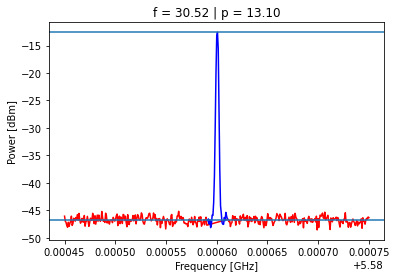

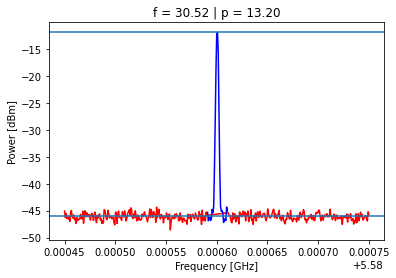

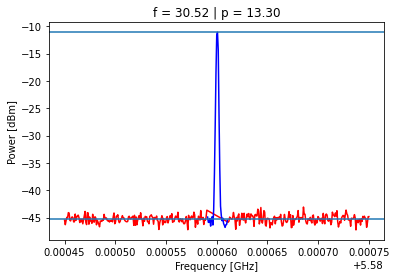

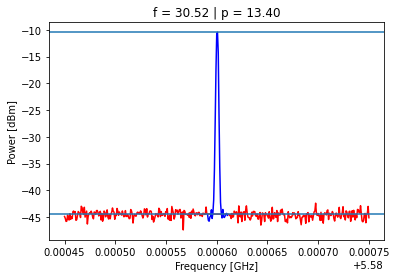

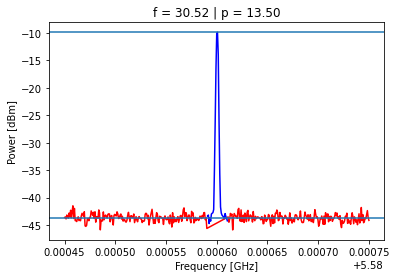

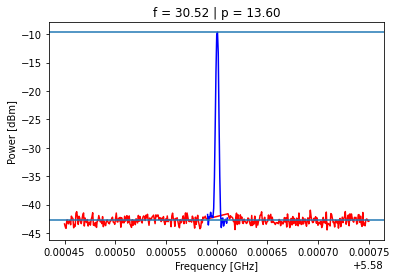

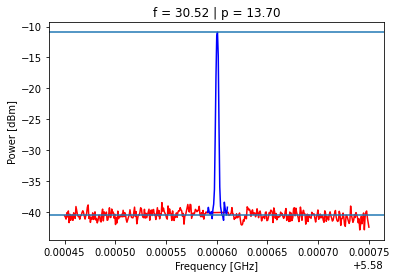

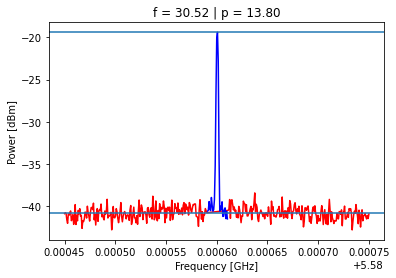

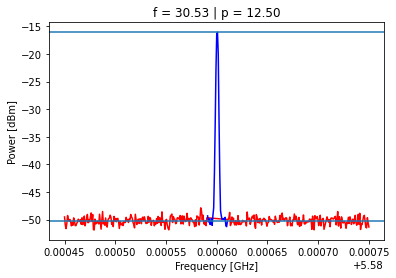

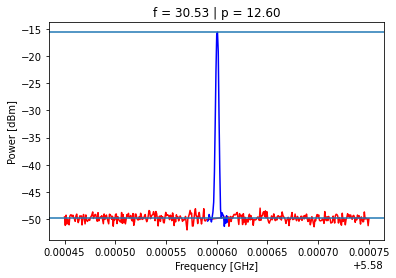

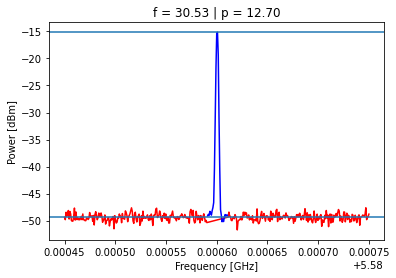

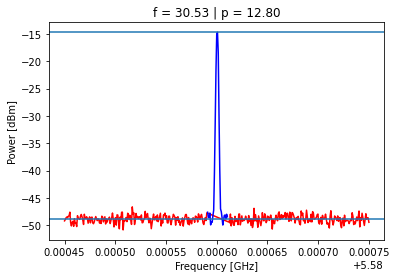

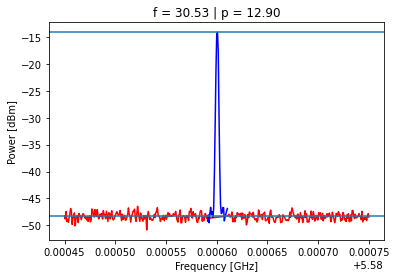

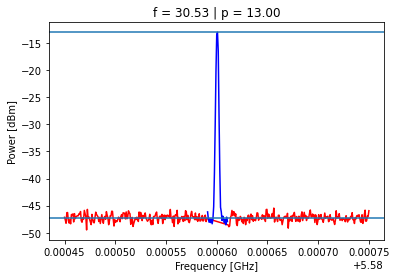

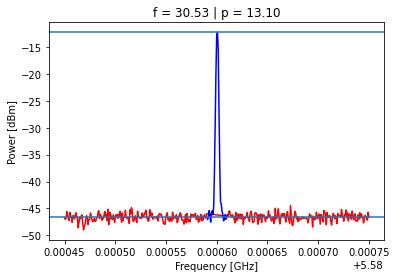

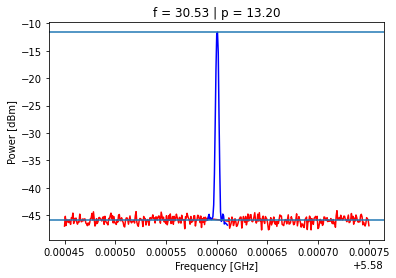

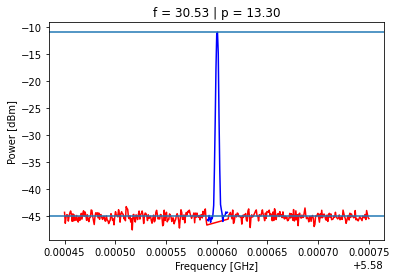

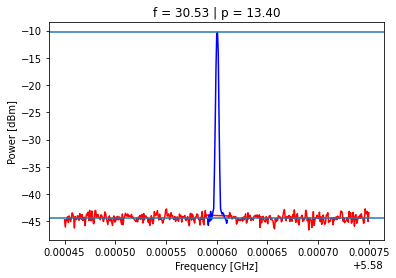

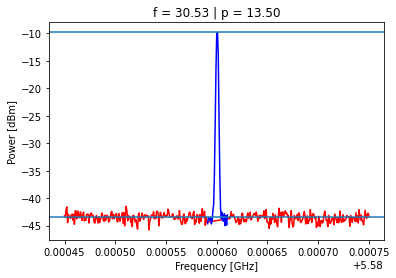

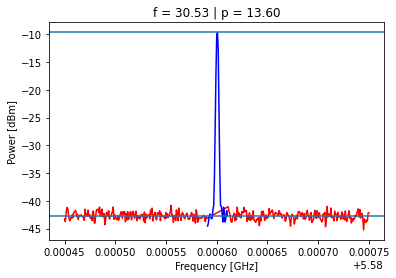

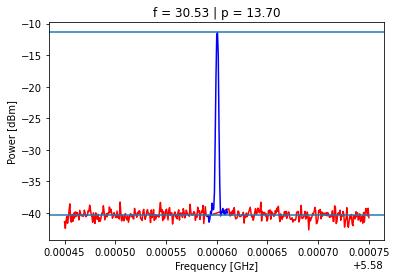

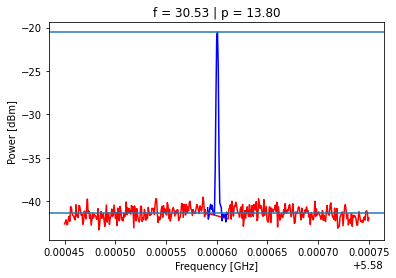

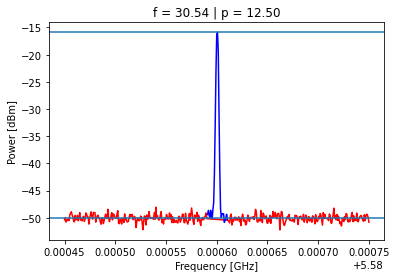

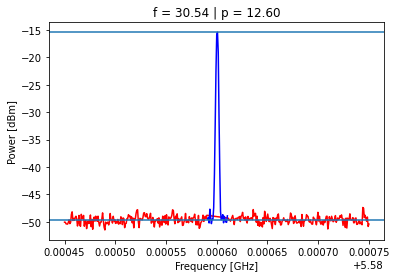

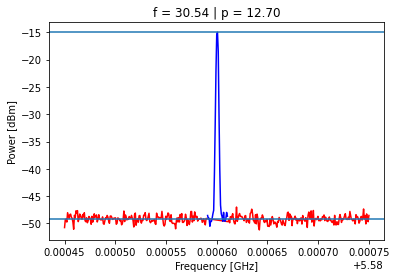

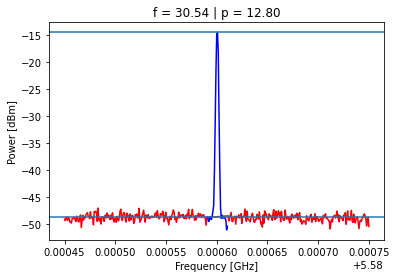

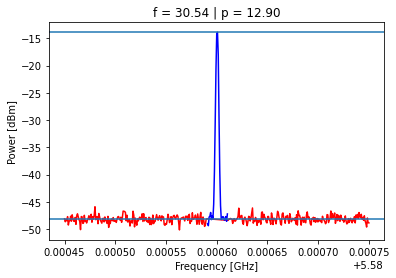

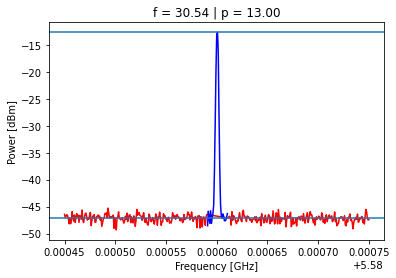

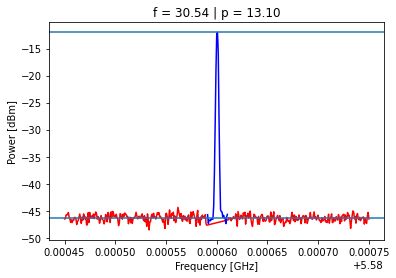

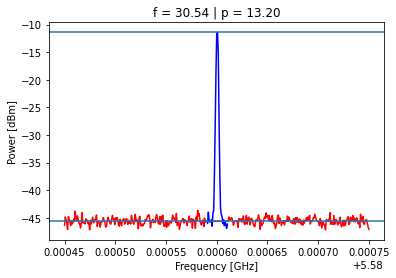

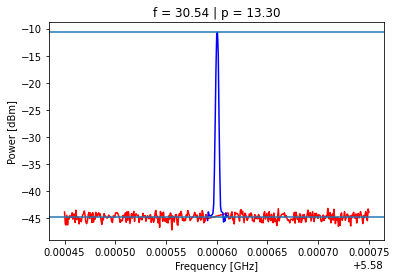

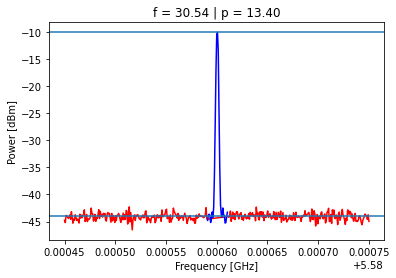

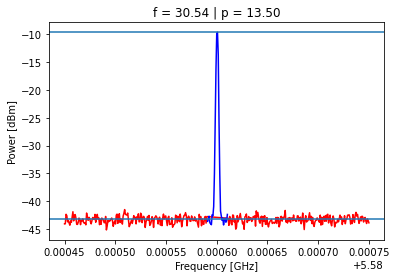

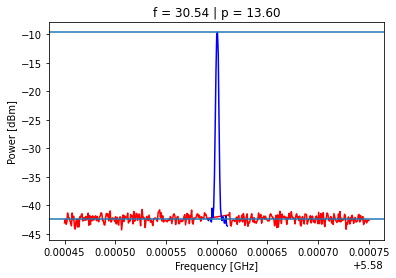

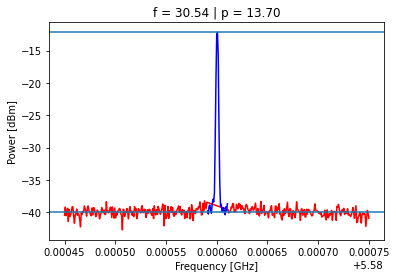

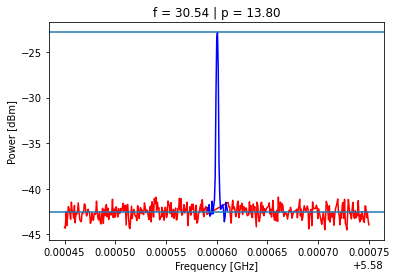

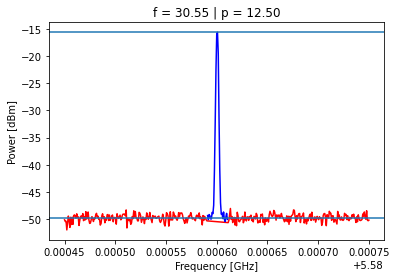

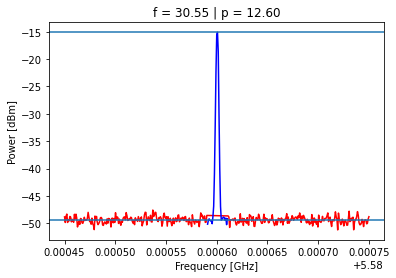

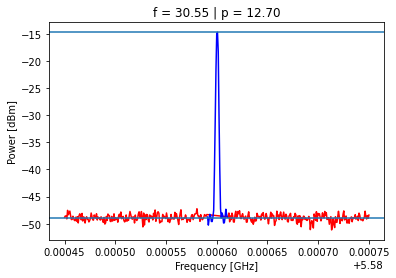

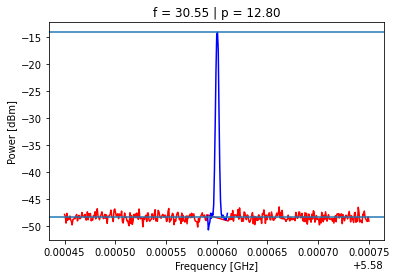

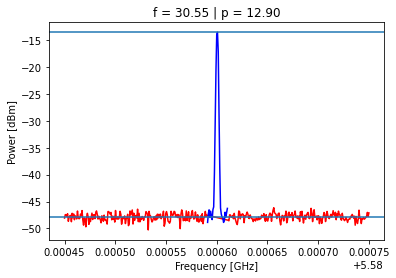

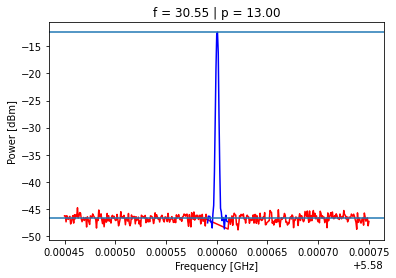

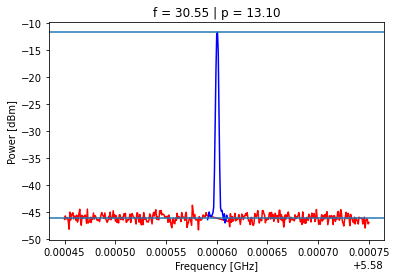

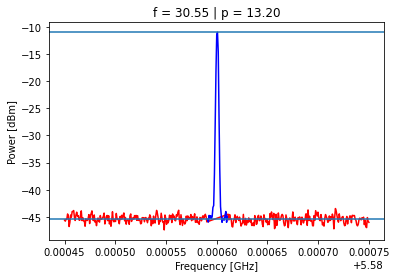

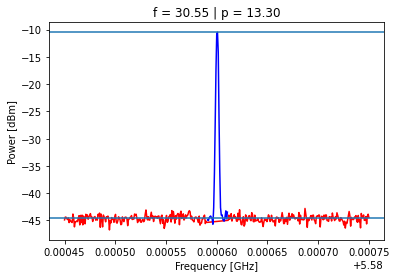

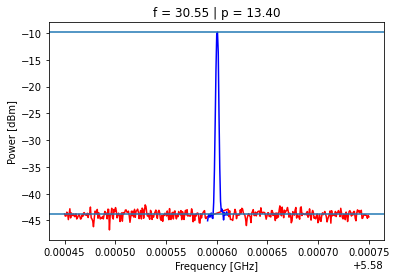

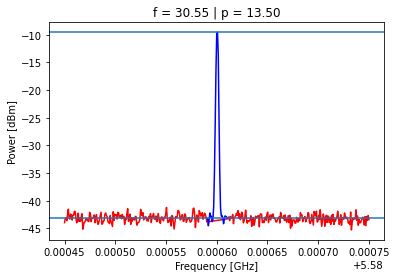

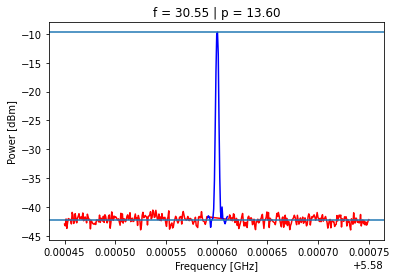

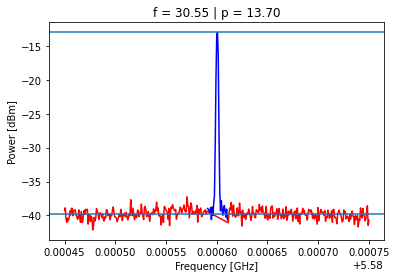

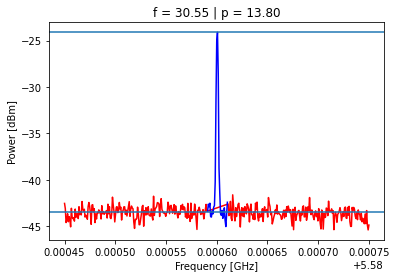

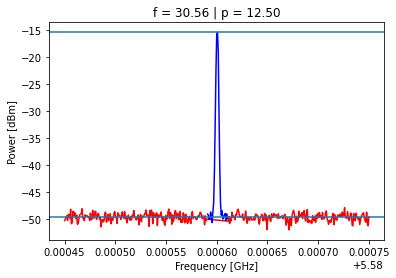

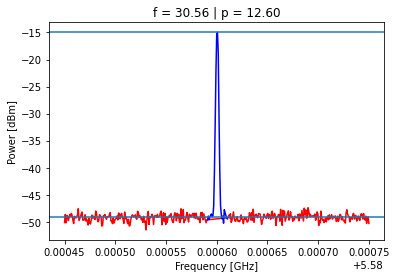

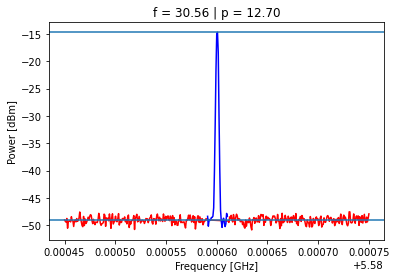

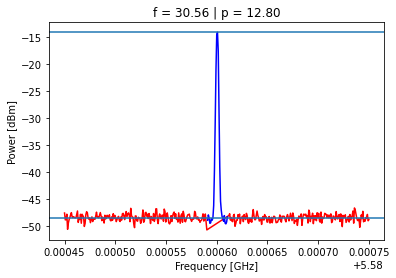

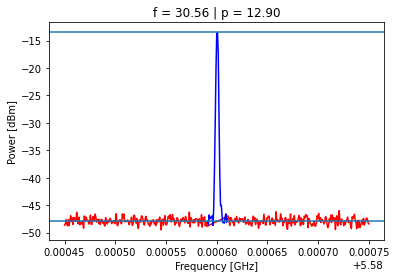

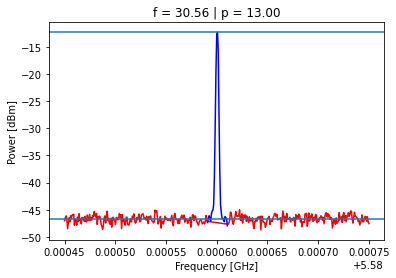

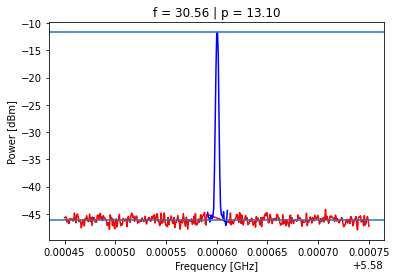

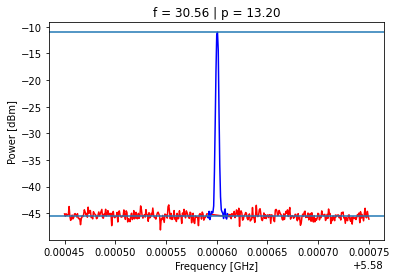

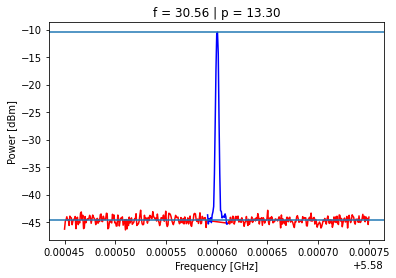

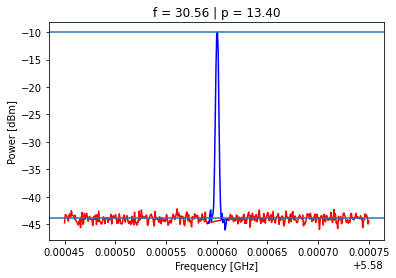

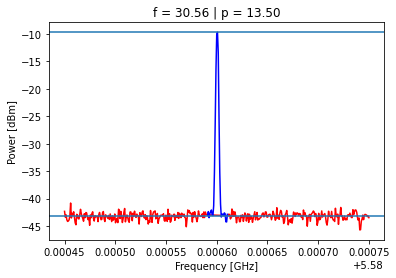

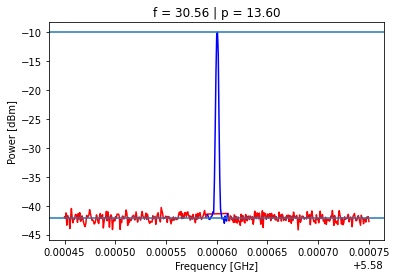

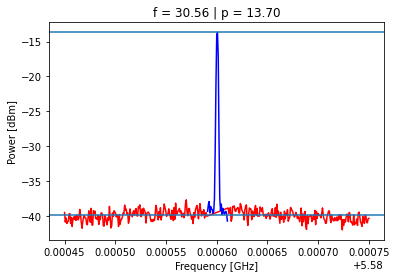

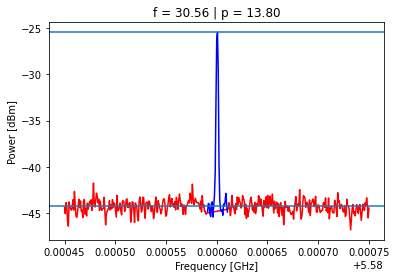

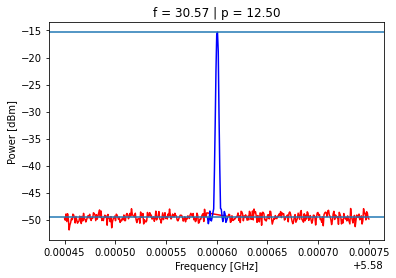

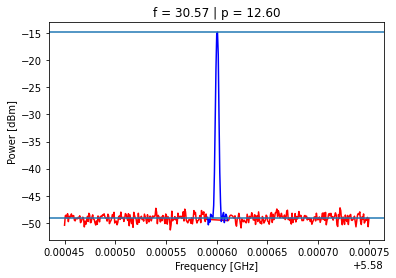

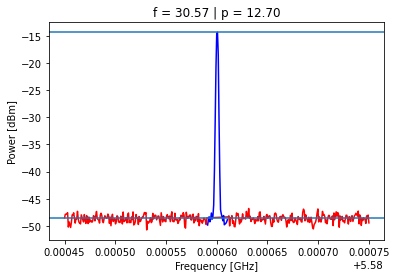

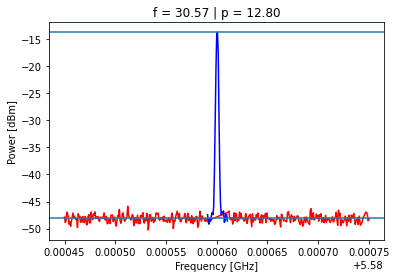

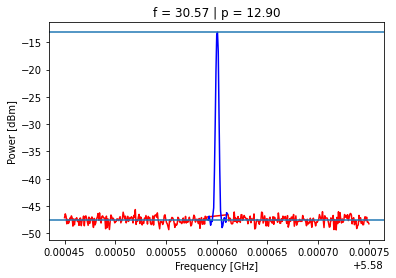

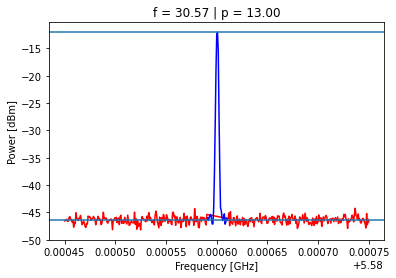

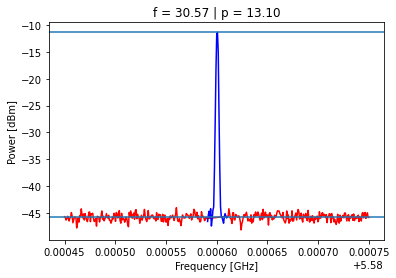

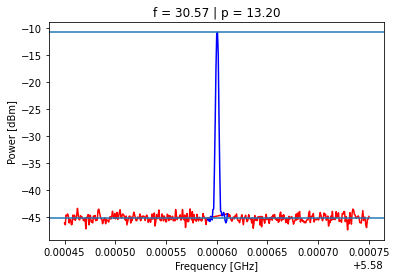

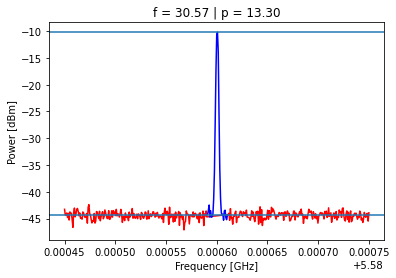

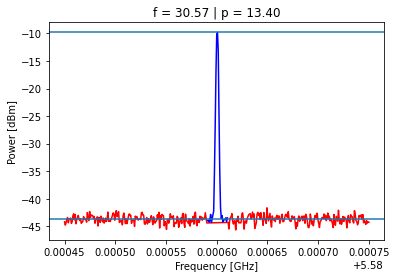

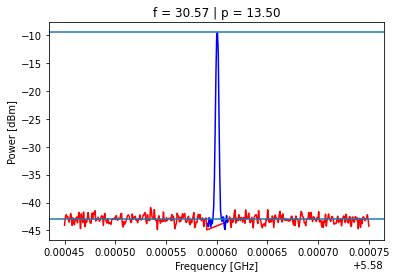

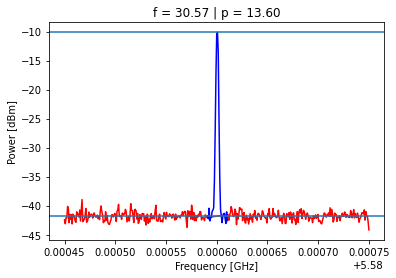

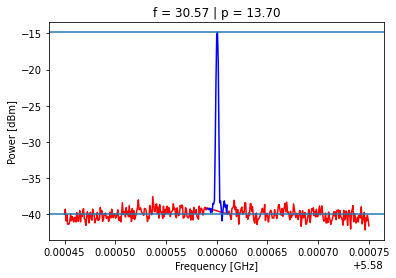

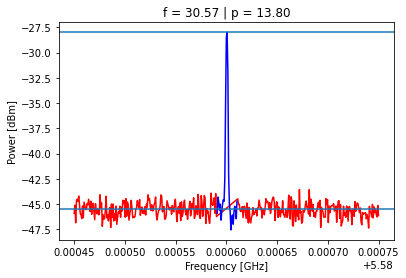

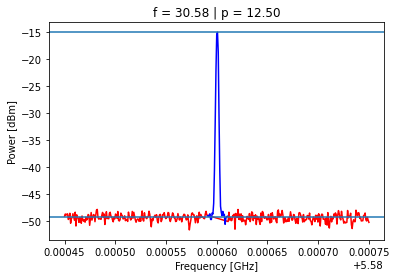

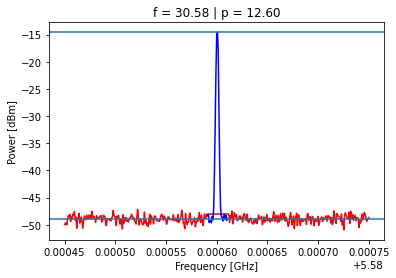

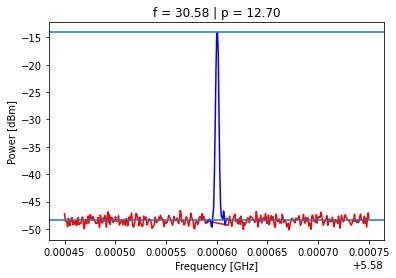

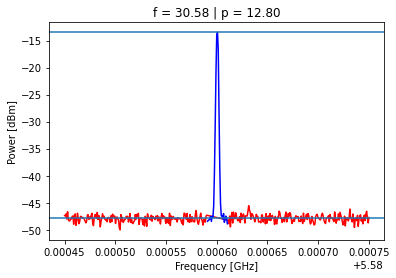

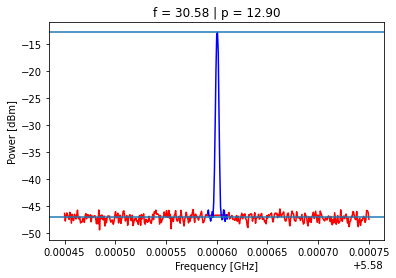

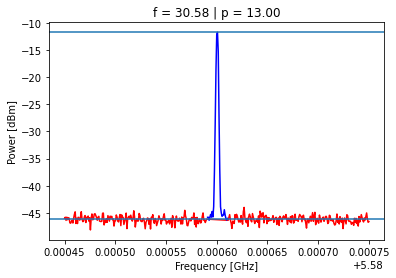

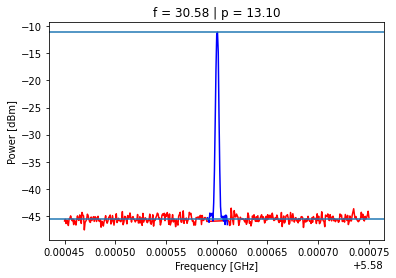

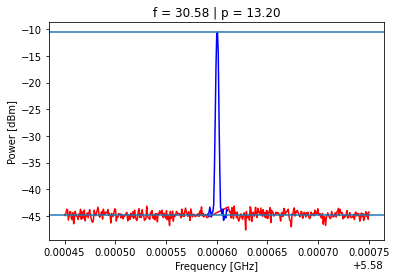

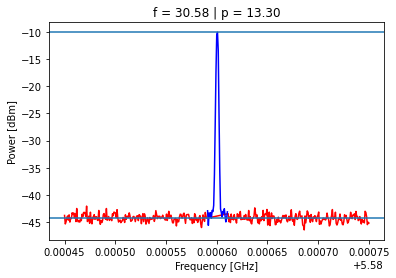

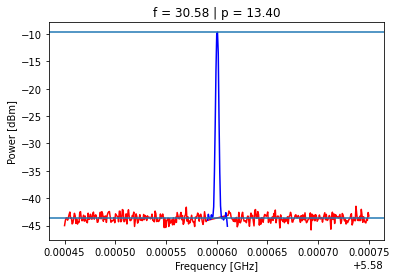

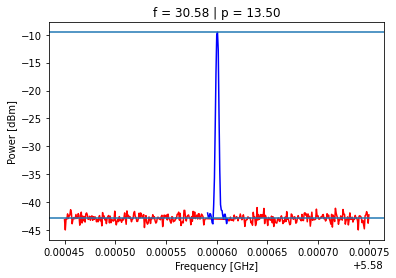

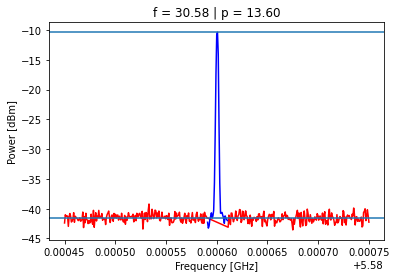

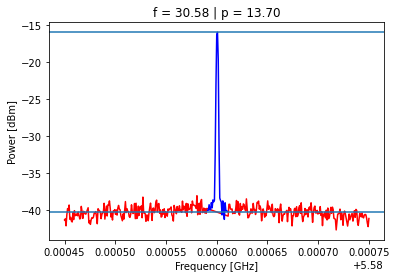

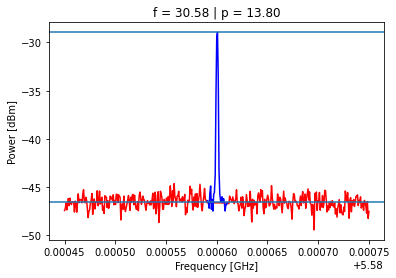

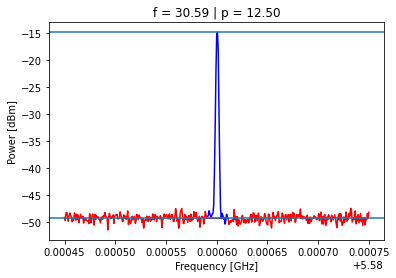

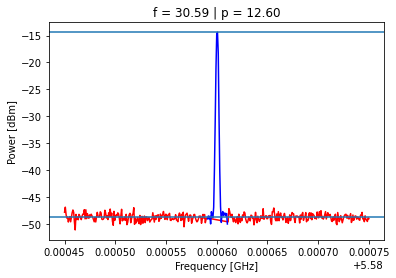

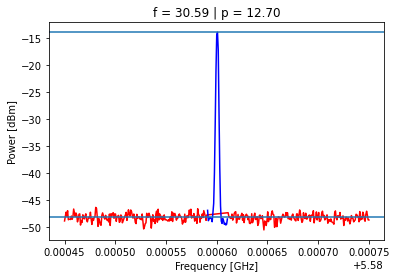

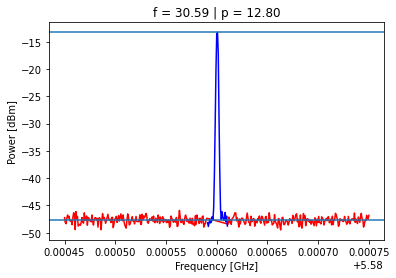

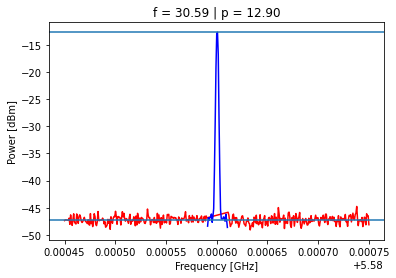

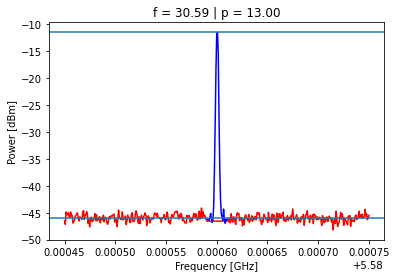

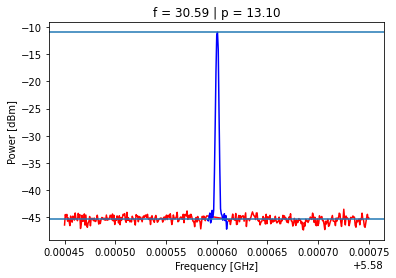

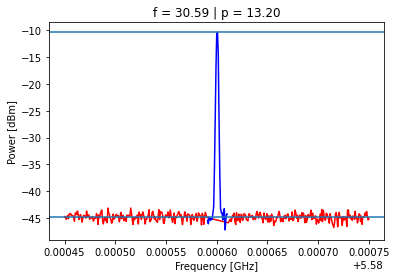

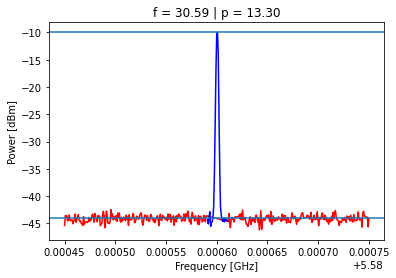

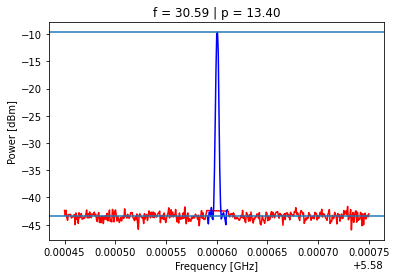

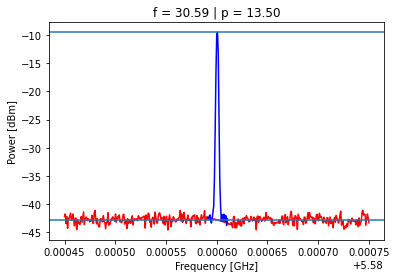

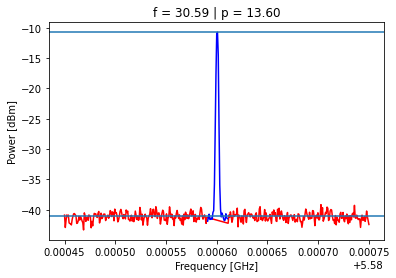

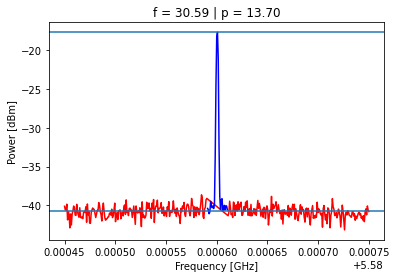

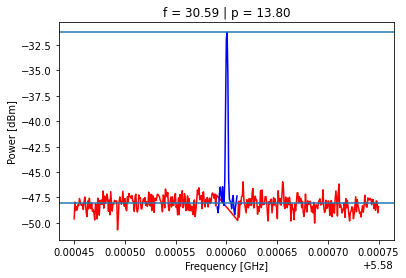

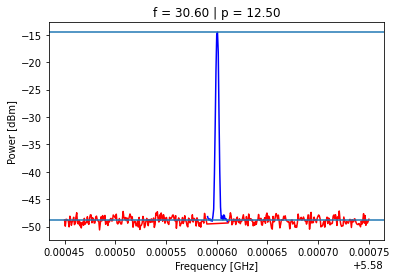

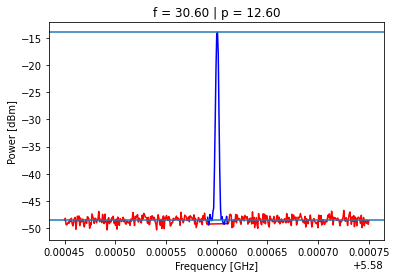

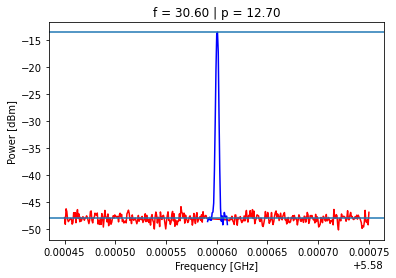

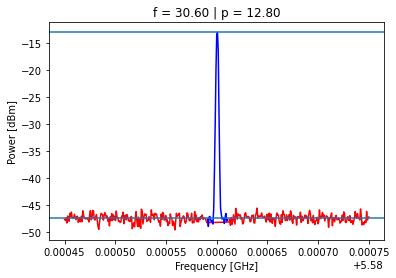

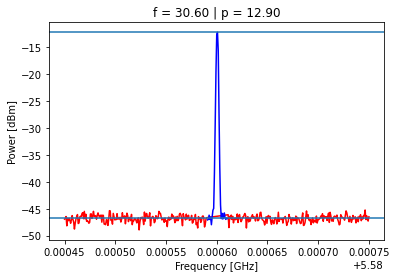

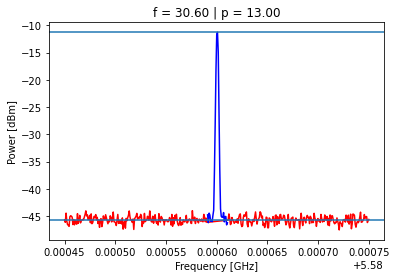

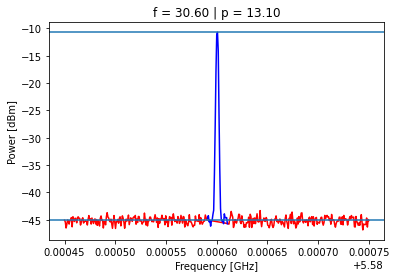

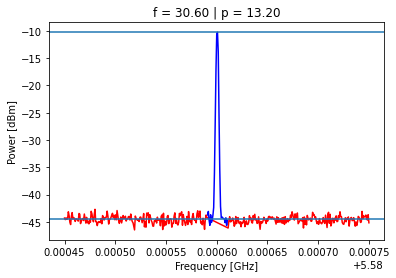

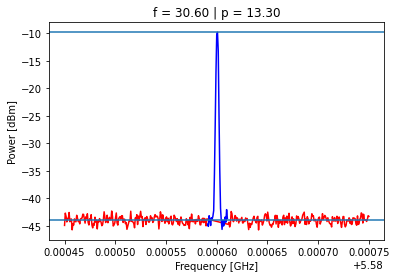

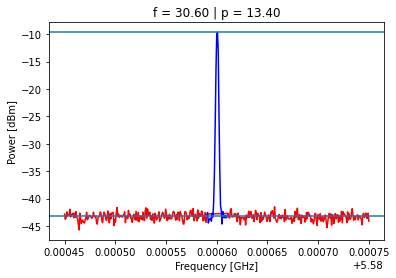

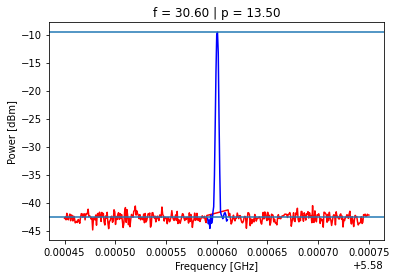

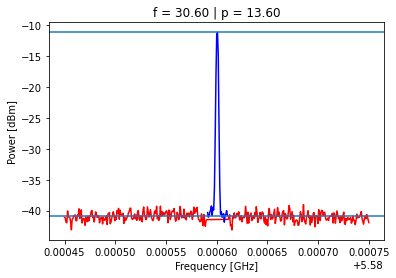

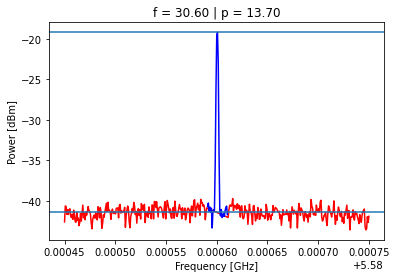

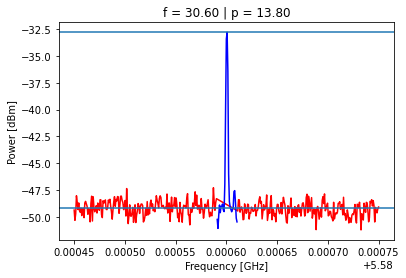

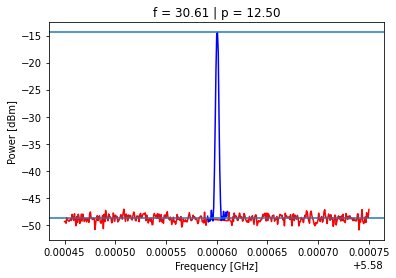

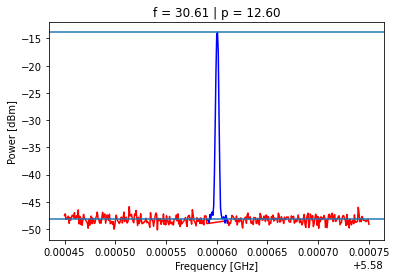

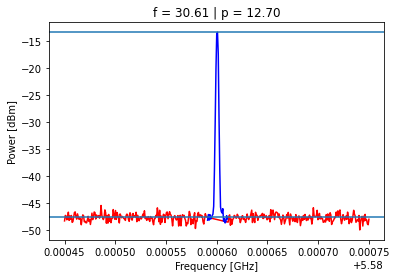

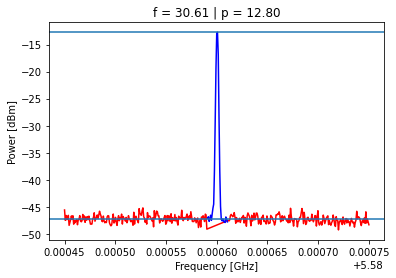

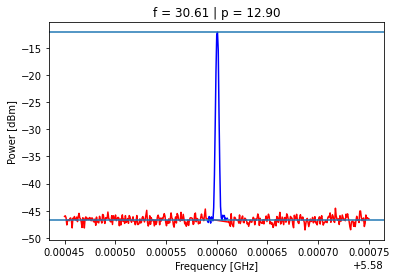

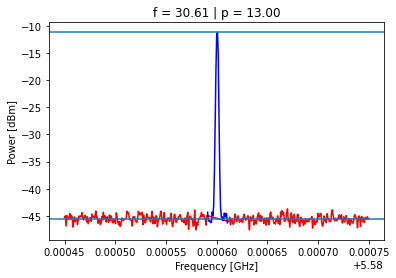

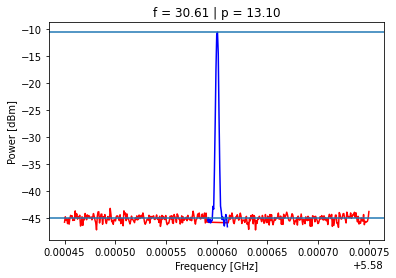

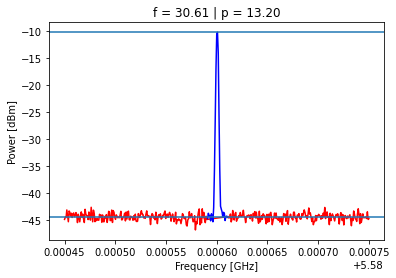

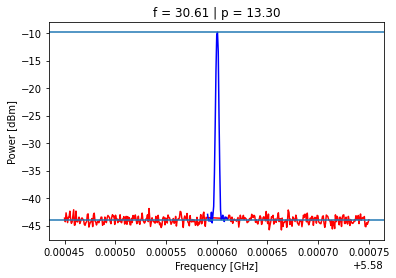

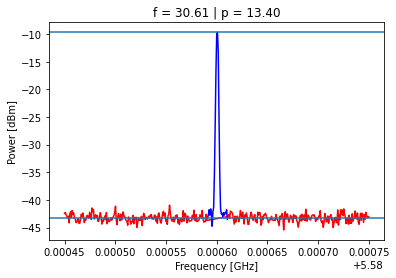

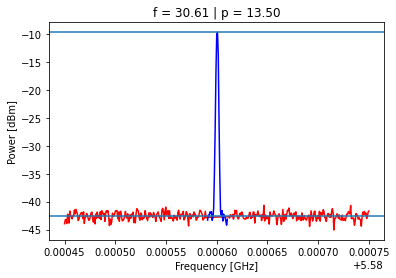

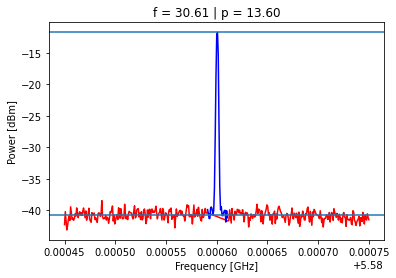

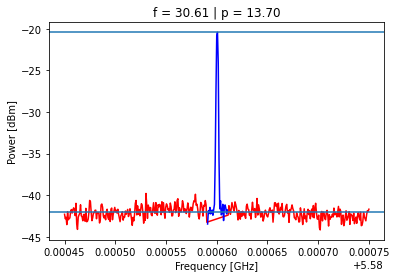

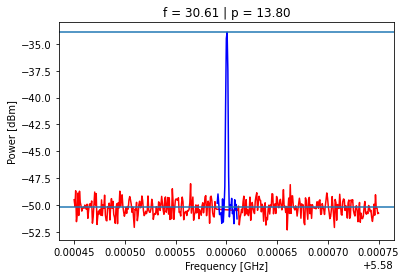

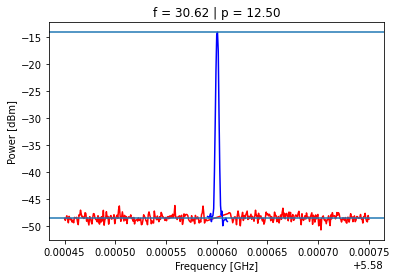

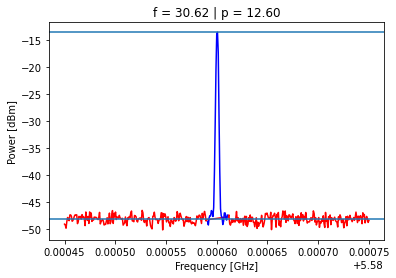

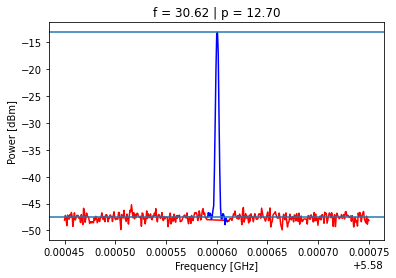

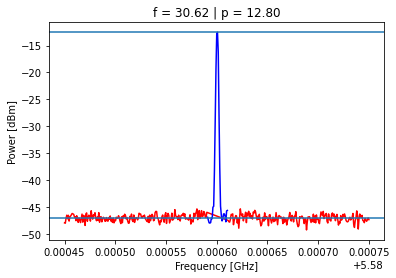

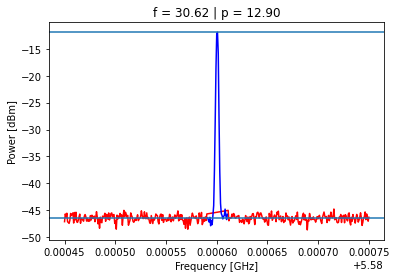

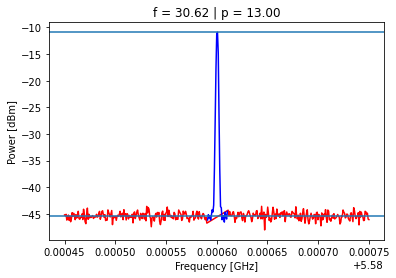

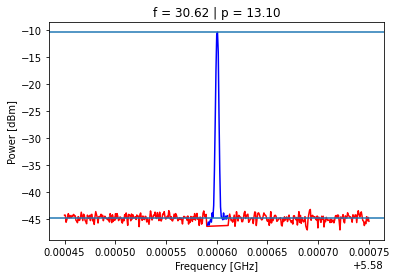

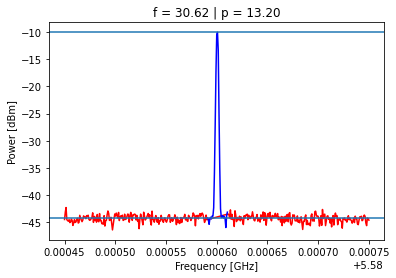

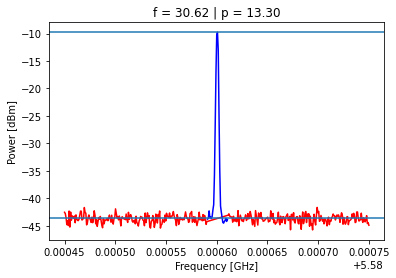

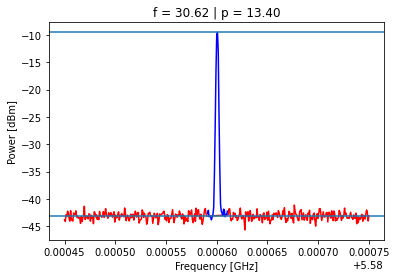

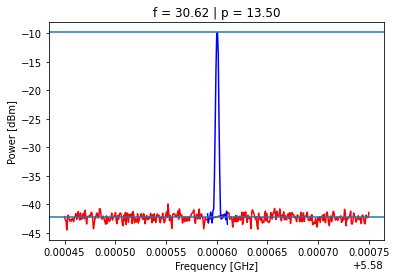

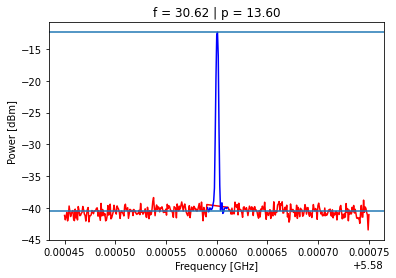

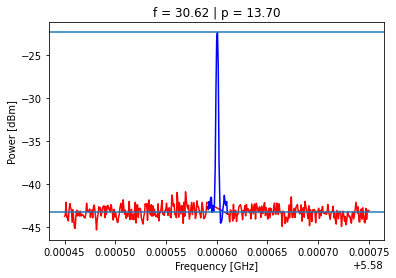

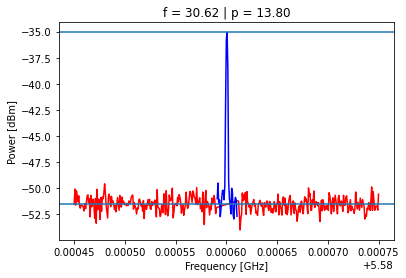

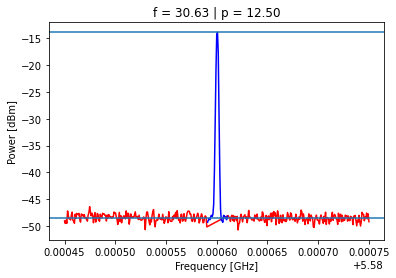

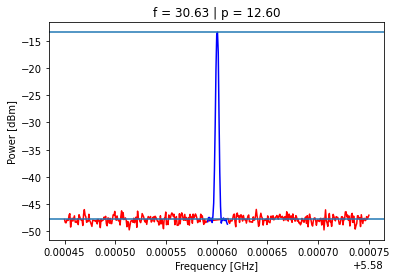

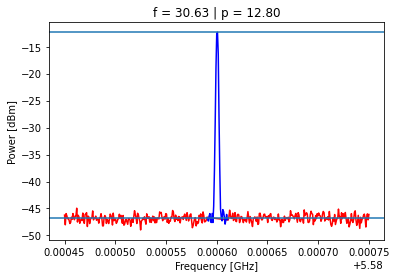

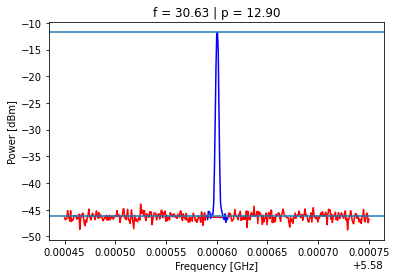

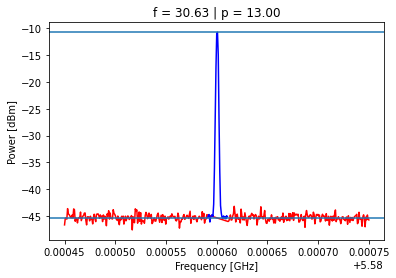

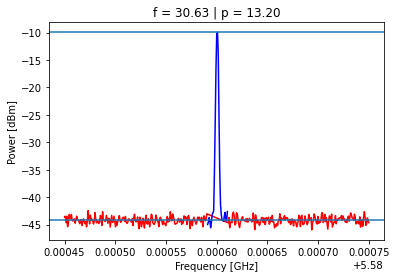

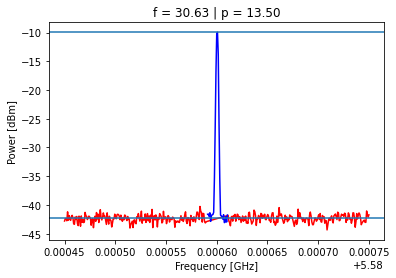

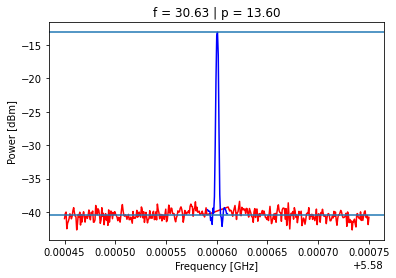

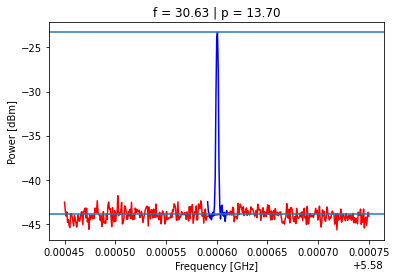

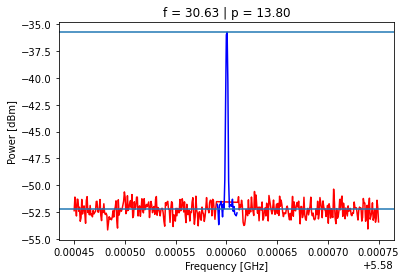

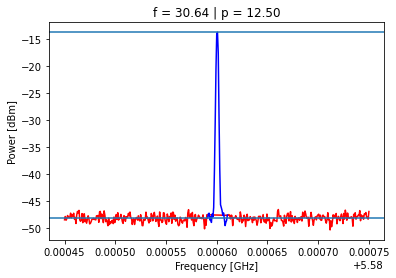

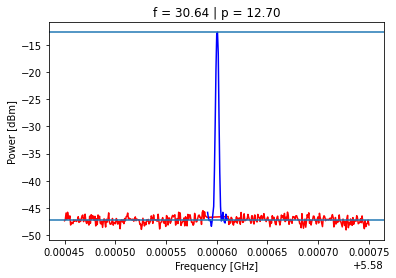

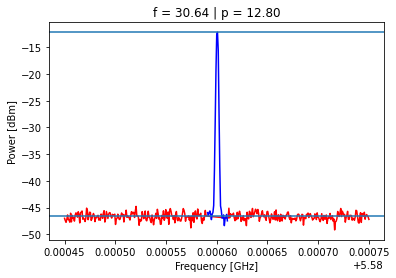

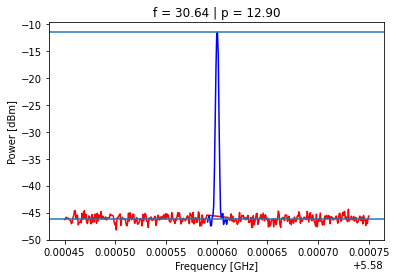

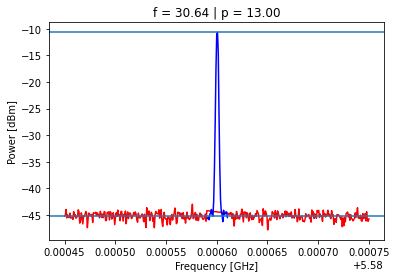

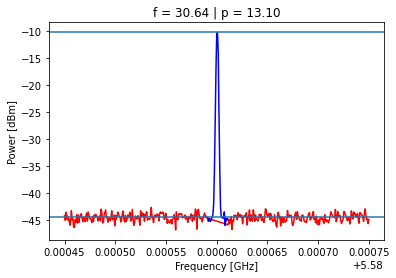

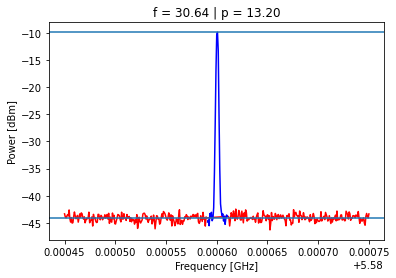

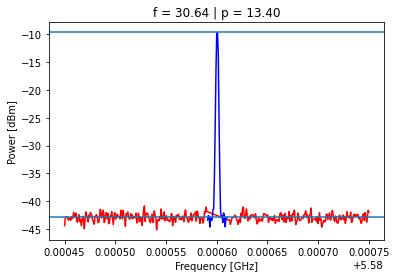

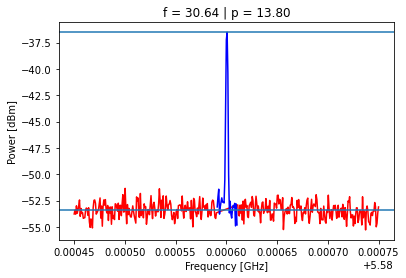

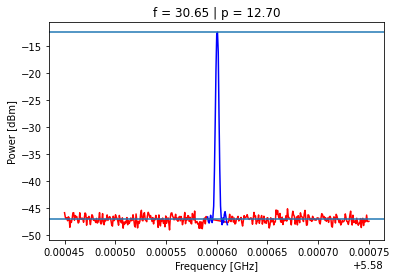

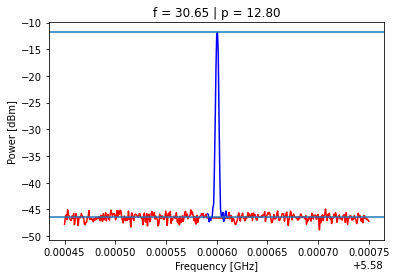

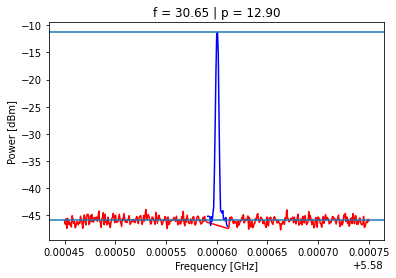

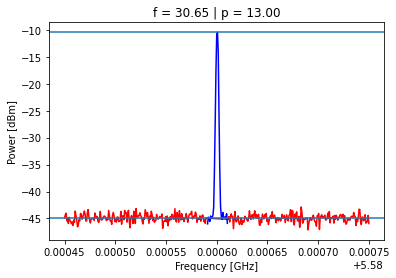

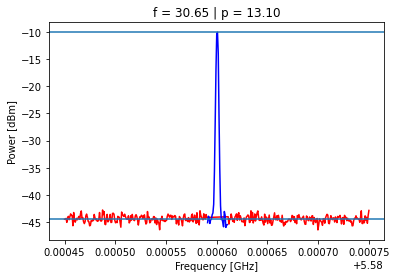

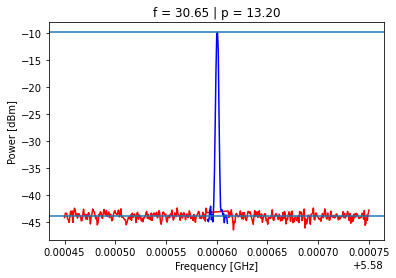

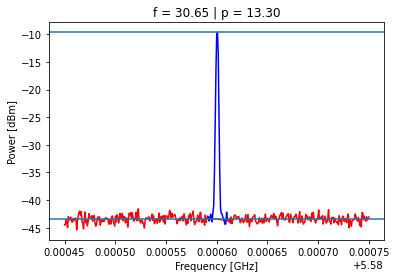

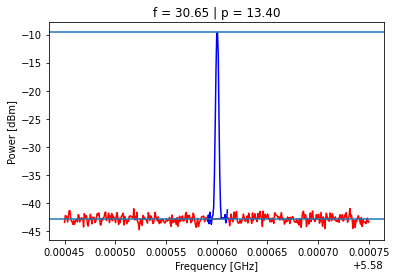

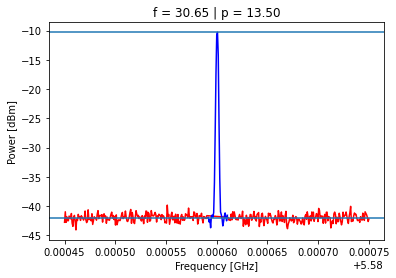

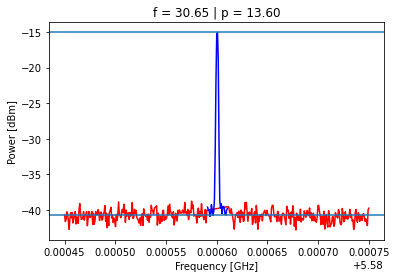

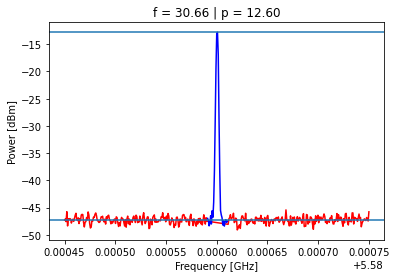

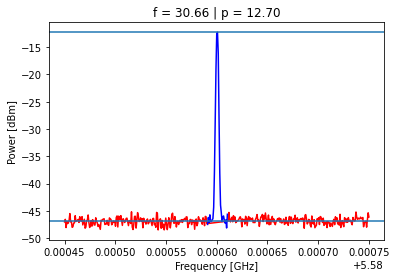

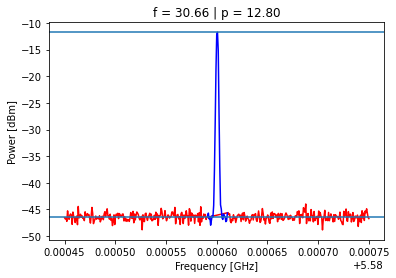

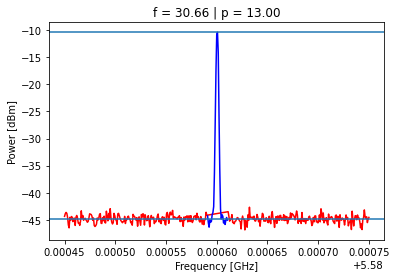

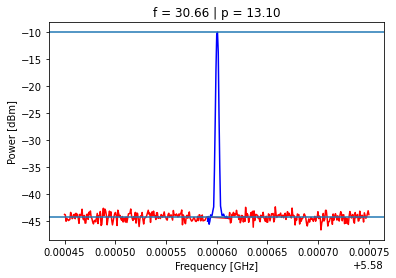

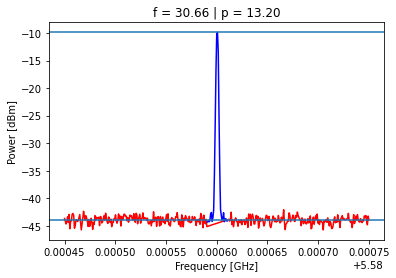

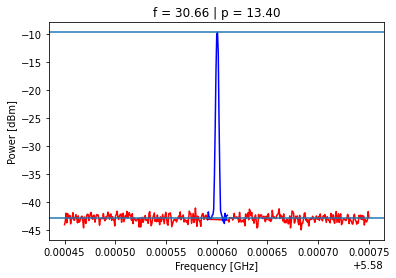

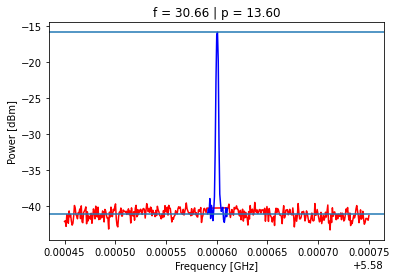

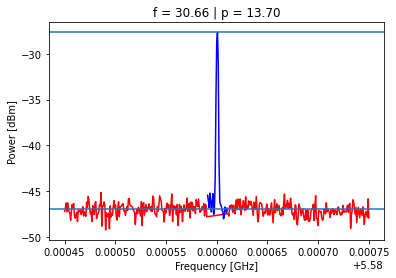

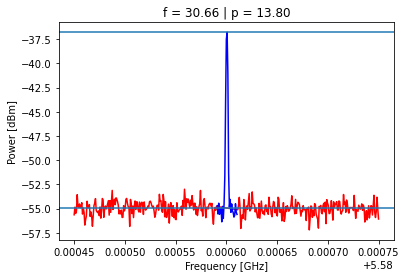

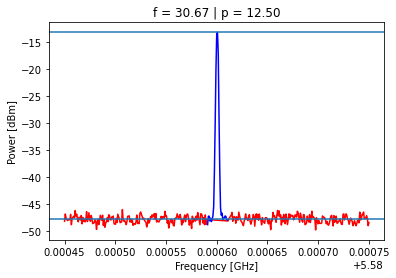

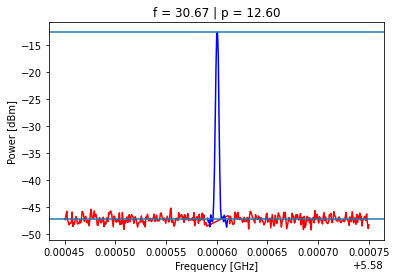

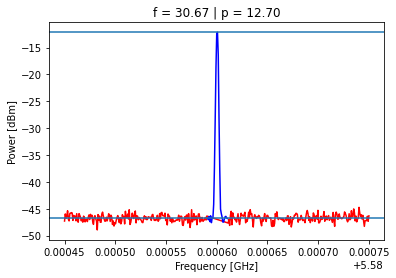

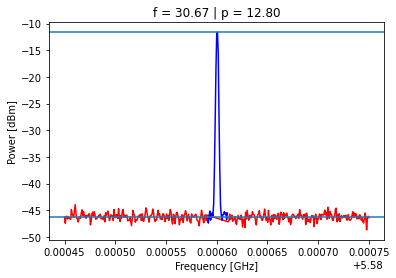

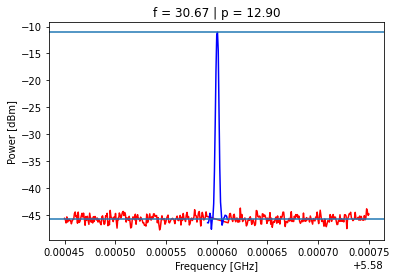

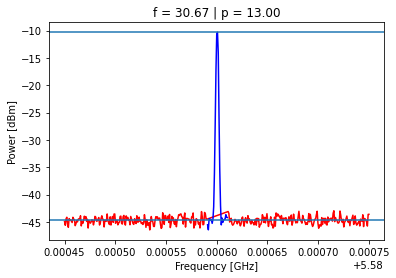

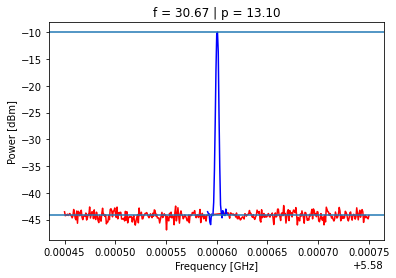

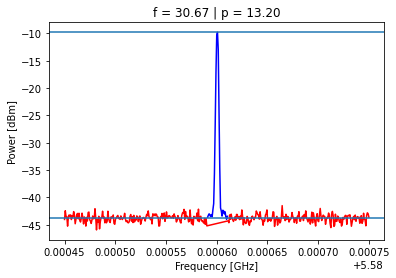

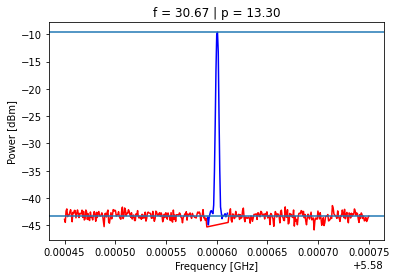

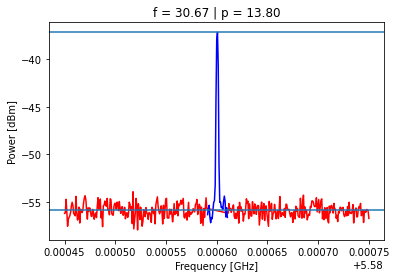

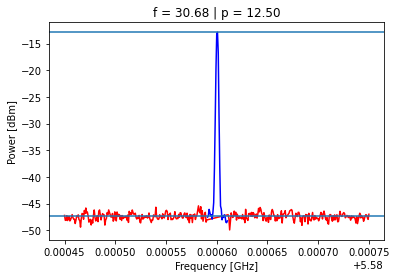

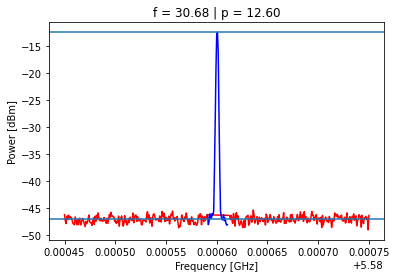

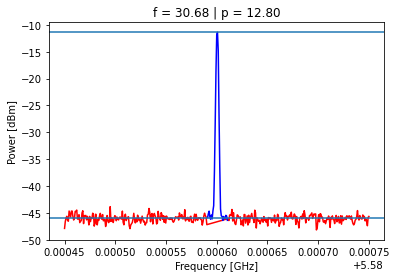

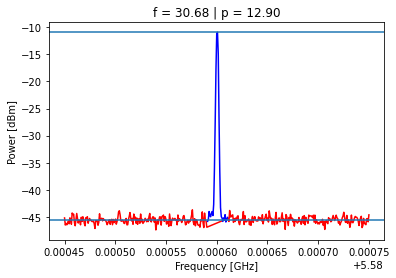

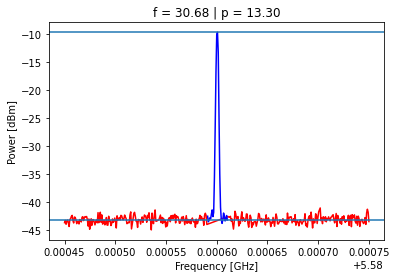

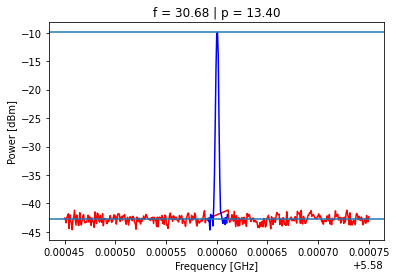

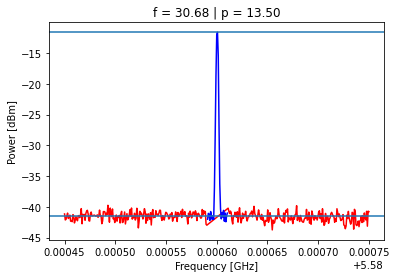

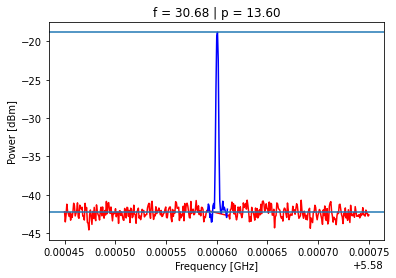

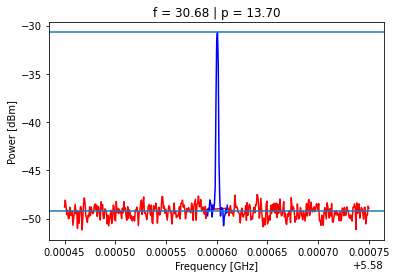

In [23]:
SNR = np.empty(datashape[:2])
MAX = np.empty(datashape[:2])
NOISE = np.empty(datashape[:2])
for i in range(datashape[0]):
    for j in range(datashape[1]):
        max_ind=np.argmax(avg_JPA[i,j])
        max_val=np.max(avg_JPA[i,j])
        mask = np.logical_or(xdata < xdata[max_ind]-10e-6, xdata > xdata[max_ind]+10e-6)
        noise=avg_JPA[i,j][mask]
        avg_noise=np.mean(noise)
        snr = Watt2dBm(max_val)-Watt2dBm(avg_noise)
        SNR[i,j] = snr
        MAX[i,j] = Watt2dBm(max_val)
        NOISE[i,j] = Watt2dBm(avg_noise)
        plt.plot(xdata[mask],Watt2dBm(avg_JPA[i,j][mask]),'red')
        plt.plot(xdata[~mask],Watt2dBm(avg_JPA[i,j][~mask]),'blue')
        plt.axhline(Watt2dBm(max_val))
        plt.axhline(Watt2dBm(avg_noise))
        plt.title(f'f = {flux[i]:.2f} | p = {power[j]:.2f}')
        plt.xlabel('Frequency [GHz]')
        plt.ylabel('Power [dBm]')
        plt.show()
        plt.close()

In [24]:
print(np.max(SNR))
print(np.min(SNR))

34.65053478602513
16.306523367310888


In [42]:
max_ind = np.argmax(SNR)
print(max_ind)
ind2 = max_ind%datashape[1]
ind1 = max_ind//datashape[1]

max_ind = (ind1,ind2)
print(max_ind)

SNR[max_ind]

423
(30, 3)


34.65053478602513

In [32]:
print(f'optimal SNR at flux = {flux[max_ind[0]]} mA and pump power = {power[max_ind[1]]} dBm')

optimal SNR at flux = 30.68 mA and pump power = 12.799999999999999 dBm


<ipython-input-30-453c7b3df5ce>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im1 = ax[0].pcolormesh(XX, YY, SNR)
<ipython-input-30-453c7b3df5ce>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im2 = ax[1].pcolormesh(XX, YY, NOISE)


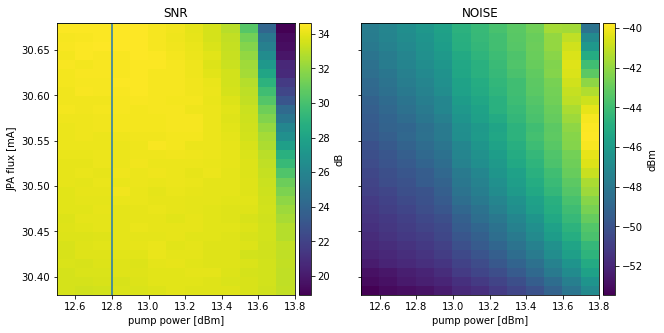

In [30]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

XX,YY = np.meshgrid(power,flux)

fig,ax = plt.subplots(1,2,sharey=True,figsize=[10,5])

im1 = ax[0].pcolormesh(XX, YY, SNR)
divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical',label='dB')
ax[0].set_title('SNR')
ax[0].set_ylabel('JPA flux [mA]')
ax[0].set_xlabel('pump power [dBm]')
ax[0].axvline(power[max_ind[1]])
ax[0].axhline(flux[max_ind[0]])
im2 = ax[1].pcolormesh(XX, YY, NOISE)
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical',label='dBm')
ax[1].set_title('NOISE')
ax[1].set_xlabel('pump power [dBm]')
plt.show()

In [33]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

XX,YY = np.meshgrid(power,flux)

fig,ax = plt.subplots(1,2,sharey=True,figsize=[10,5])

im1 = ax[0].pcolormesh(XX, YY, SNR)
divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical',label='dB')
ax[0].set_title('SNR')
ax[0].set_ylabel('JPA flux [mA]')
ax[0].set_xlabel('pump power [dBm]')
ax[0].axvline(power[max_ind[1]])
ax[0].axhline(flux[max_ind[0]])
im2 = ax[1].pcolormesh(XX, YY, MAX)
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical',label='dBm')
ax[1].set_title('Amplitude')
ax[1].set_xlabel('pump power [dBm]')
plt.show()

<ipython-input-33-e2cc2a48fe84>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im1 = ax[0].pcolormesh(XX, YY, SNR)
<ipython-input-33-e2cc2a48fe84>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im2 = ax[1].pcolormesh(XX, YY, MAX)


In [52]:
SNR.shape

(31, 14)

In [50]:
import pickle

In [51]:
spath = r"G:\Shared drives\LFL\Projects\Quasiparticles\TestDataOptimization\\"
with open(spath+'SNR.pkl','wb') as f:
    pickle.dump(SNR,f)
with open(spath+'power.pkl','wb') as f:
    pickle.dump(power,f)
with open(spath+'flux.pkl','wb') as f:
    pickle.dump(flux,f)

In [49]:
print(f'JPA and TWPA on increases SNR by {SNR[max_ind] - 20.317:.2f}')

JPA and TWPA on increases SNR by 14.33


In [35]:
print(f'This is a factor of {10**1.433} reduction of the HEMT noise temperature, which is probably about 3.5 K. This means the system noise temperature is likely around {3.5*10**-1.433} K')

This is a factor of 27.10191631890843 reduction of the HEMT noise temperature, which is probably about 3.5 K. This means the system noise temperature is likely around 0.1291421594995526 K


## That's pretty damn close to the quantum limit

In [36]:
from scipy.constants import Planck,Boltzmann
print(f'at 5.58 GHz, the quantum limit of noise temperature is {5.58e9*Planck/Boltzmann/2:.3f} K')

at 5.58 GHz, the quantum limit of noise temperature is 0.134 K


### This looks like we're doing better than quantum limit, but we're very much guessing at the noise temperature with both pumps off.

In [43]:
print(f'JPA on increases SNR by {SNR[max_ind] - 30.551:.2f}')

JPA on increases SNR by 4.10


In [46]:
print(f'The JPA reduces the noise temperature from TWPA by a factor of {10**0.41:.2f}')

The JPA reduces the noise temperature from TWPA by a factor of 2.57


In [47]:
print(f'This is a factor of {10**1.433} reduction of the HEMT noise temperature, which is probably about 4 K. This means the system noise temperature is likely around {4*10**-1.433} K')

This is a factor of 27.10191631890843 reduction of the HEMT noise temperature, which is probably about 4 K. This means the system noise temperature is likely around 0.14759103942806012 K
